<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Marketing%20chap%2002%20Bank_marketing_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastcluster

     |████████████████████████████████| 163kB 2.8MB/s 


In [ ]:
# Load basic library
import re
import numpy as np
import time
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats

# import require packages for plotting
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
import plotly
from plotly import tools
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
sns.set()
import altair as alt


# Load Keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras import backend as K

from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy


#Load sklearn
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

import fastcluster
#import hdbscan
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import MiniBatchDictionaryLearning #other
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

#imblearn library
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecati

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/llhthinker/MachineLearningLab/master/UCI%20Bank%20Marketing%20Data%20Set/data/bank-additional/bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data analysis (hands on)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


Bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


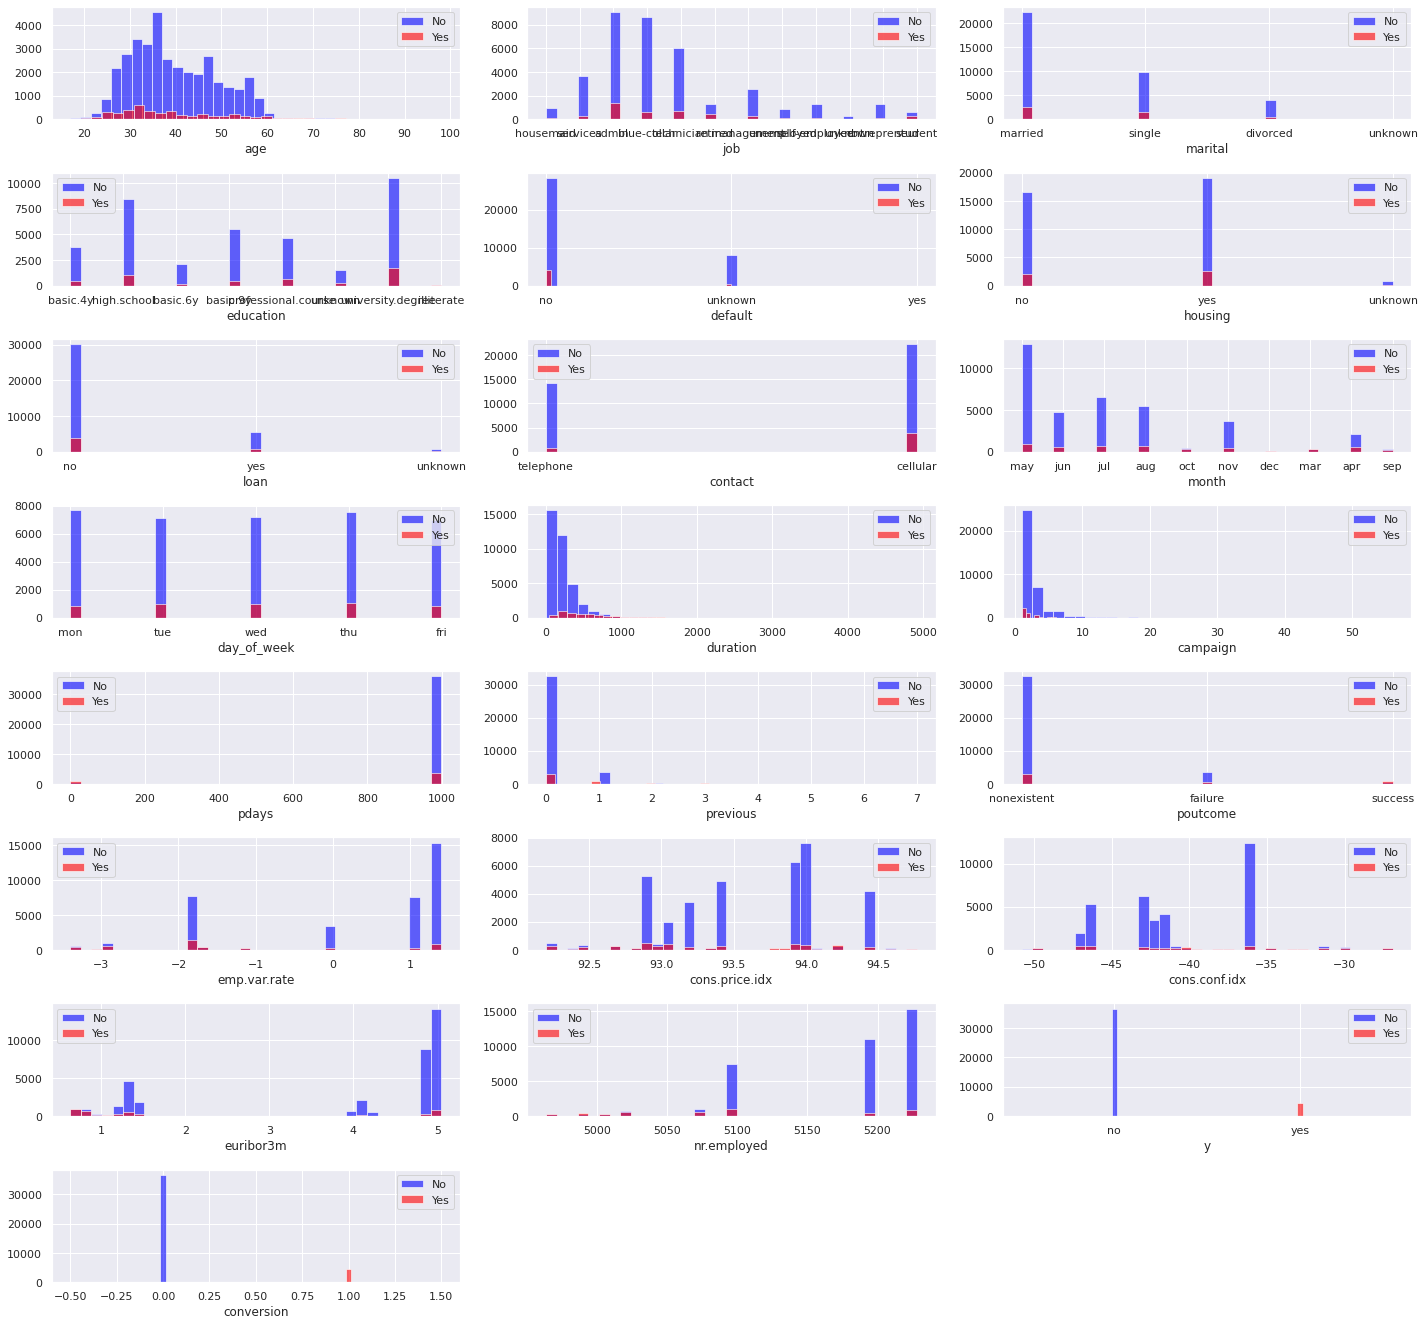

In [ ]:
plt.figure(figsize=(20, 25))

for i, column in enumerate(df.columns, 1):
  plt.subplot(11, 3, i)
  df[df["conversion"] == 0][column].hist(bins=35, color='blue', label='No', alpha=0.6)
  df[df["conversion"] == 1][column].hist(bins=35, color='red', label='Yes', alpha=0.6)
  plt.legend()
  plt.xlabel(column)
plt.tight_layout()
plt.show()

## Conversion Rate

## Aggregate Conversion Rate

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:

print('total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))

total conversions: 4640 out of 41188


In [ ]:
print('conversion rate: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

conversion rate: 11.27%


## Conversion Rates by Number of Contacts

In [ ]:
conversions_by_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0
pd.DataFrame(conversions_by_contacts).sort_values(by='conversion',ascending=False)

,conversion
campaign,
1,13.037071
2,11.456954
3,10.747051
4,9.392682
6,7.660878
5,7.504690
17,6.896552
11,6.779661
23,6.250000


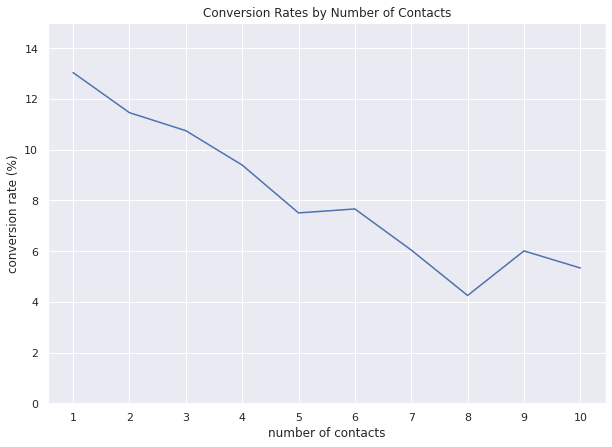

In [ ]:

ax = conversions_by_contacts[:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Contacts'
)

ax.set_ylim([0, 15])
ax.set_xlabel('number of contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()

## Conversion Rates by Age

In [ ]:
conversions_by_age = df.groupby(
    by='age'
)['conversion'].sum() / df.groupby(
    by='age'
)['conversion'].count() * 100.0

pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


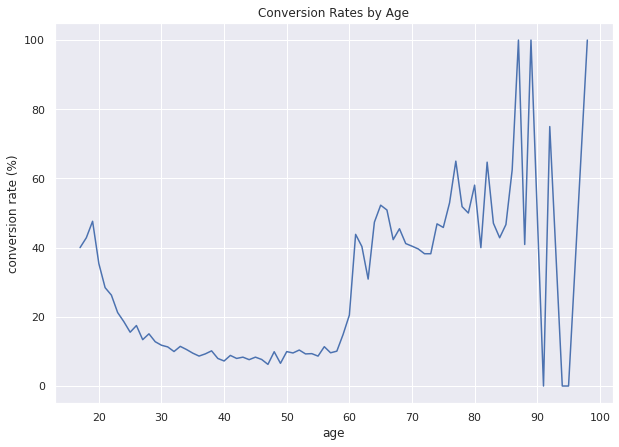

In [ ]:
ax = conversions_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

Age group

In [ ]:
df['age_group'] = df['age'].apply(
    lambda x: 
    '[18, 30)' if x < 30 else '[30, 40)' 
    if x < 40 else '[40, 50)' if x < 50 else '[50, 60)' 
    if x < 60 else '[60, 70)' if x < 70 else '70+'
)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"


In [ ]:
conversions_by_age_group = df.groupby(
    by='age_group'
)['conversion'].sum() / df.groupby(
    by='age_group'
)['conversion'].count() * 100.0

pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
70+,47.121535
"[18, 30)",16.263891
"[30, 40)",10.125162
"[40, 50)",7.923238
"[50, 60)",10.157389
"[60, 70)",34.668508


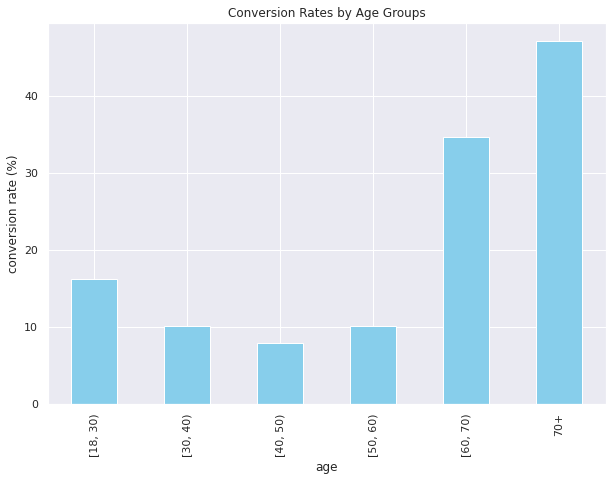

In [ ]:
ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

## Conversions vs. Non-Conversions

### Marital status

In [ ]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital',
                                                  columns='conversion', aggfunc=len)
conversions_by_marital_status_df.columns = ['non_conversions', 'conversions']
conversions_by_marital_status_df

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


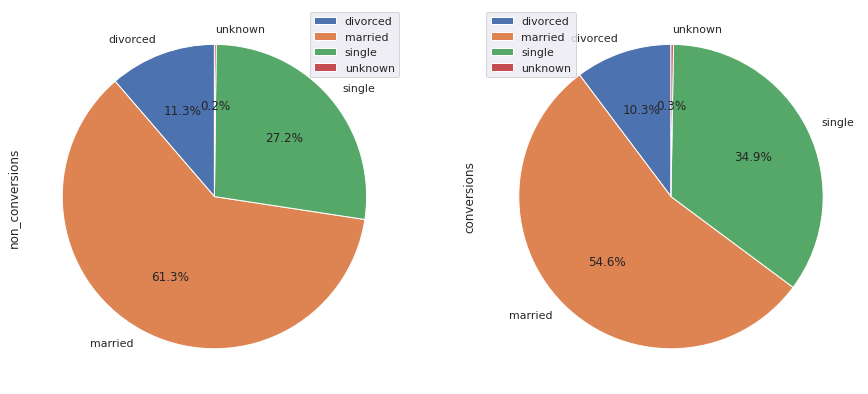

In [ ]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

### Education

In [ ]:
conversions_by_education_df = pd.pivot_table(df, values='y', index='education', columns='conversion', aggfunc=len)
conversions_by_education_df.columns = ['non_conversions', 'conversions']
conversions_by_education_df

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


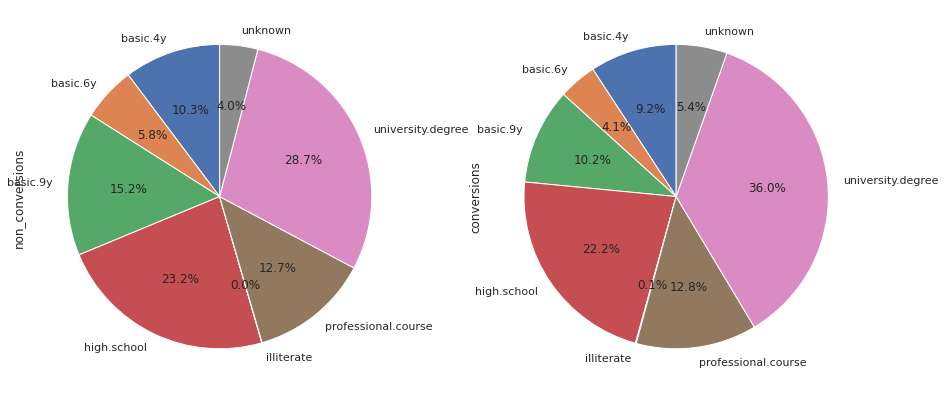

In [ ]:
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

### Last contact duration

1 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 40)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40, 50)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 60)"


In [ ]:
df.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [ ]:
duration_df = pd.concat([
    df.loc[df['conversion'] == 1, 'duration'].reset_index(drop=True), 
    df.loc[df['conversion'] == 0, 'duration'].reset_index(drop=True)
], axis=1)

duration_df.columns = ['conversions', 'non_conversions']

duration_df = duration_df / (60*60)
duration_df

,conversions,non_conversions
0,0.437500,0.072500
1,0.289444,0.041389
2,0.407500,0.062778
3,0.160833,0.041944
4,0.128056,0.085278
...,...,...
36543,NaN,0.070556
36544,NaN,0.031111
36545,NaN,0.106389
36546,NaN,0.052500


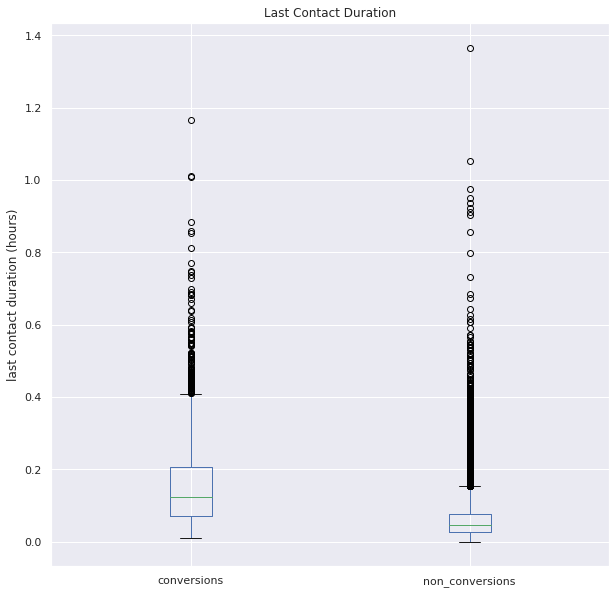

In [ ]:
ax = duration_df.plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('last contact duration (hours)')
ax.set_title('Last Contact Duration')

plt.show()

Method 2

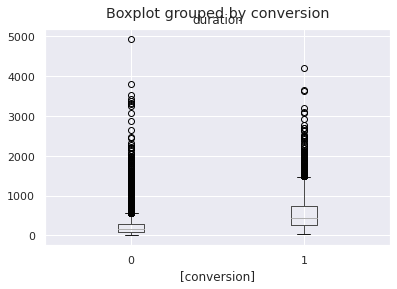

In [ ]:
df[['duration','conversion']].boxplot(by='conversion')

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'conversion',
       'age_group'],
      dtype='object')

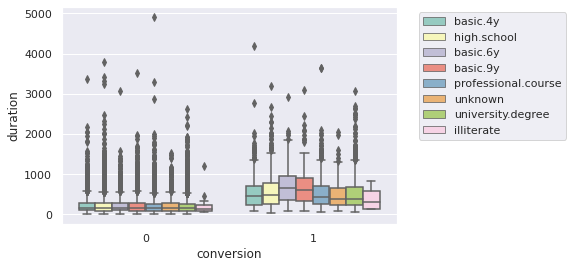

In [ ]:
sns.boxplot(x="conversion", y="duration", hue="education",
                 data=df, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Conversions by Age Groups & Marital Status

In [ ]:
df.groupby(['age_group', 'marital'])['conversion'].sum()

age_group  marital 
70+        divorced     64
           married     151
           single        6
[18, 30)   divorced     12
           married     158
           single      751
           unknown       1
[30, 40)   divorced    128
           married     897
           single      684
           unknown       6
[40, 50)   divorced    126
           married     575
           single      130
           unknown       3
[50, 60)   divorced    119
           married     533
           single       44
           unknown       1
[60, 70)   divorced     27
           married     218
           single        5
           unknown       1
Name: conversion, dtype: int64

In [ ]:
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().\
unstack('marital').fillna(0)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,64.0,151.0,6.0,0.0
"[18, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40, 50)",126.0,575.0,130.0,3.0
"[50, 60)",119.0,533.0,44.0,1.0
"[60, 70)",27.0,218.0,5.0,1.0


In [ ]:
df.groupby(by='age_group')['conversion'].count()

age_group
70+           469
[18, 30)     5669
[30, 40)    16938
[40, 50)    10526
[50, 60)     6862
[60, 70)      724
Name: conversion, dtype: int64

In [ ]:
# Lấy dữ liệu ở từng ô chia cho dữ liệu tổng theo hàng (chuyển đổi + không chuyển đổi)
age_marital_df = age_marital_df.divide(
                  df.groupby(by='age_group')['conversion'].count(), axis=0
                  )

age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


Text(0, 0.5, 'conversion rate (%)')

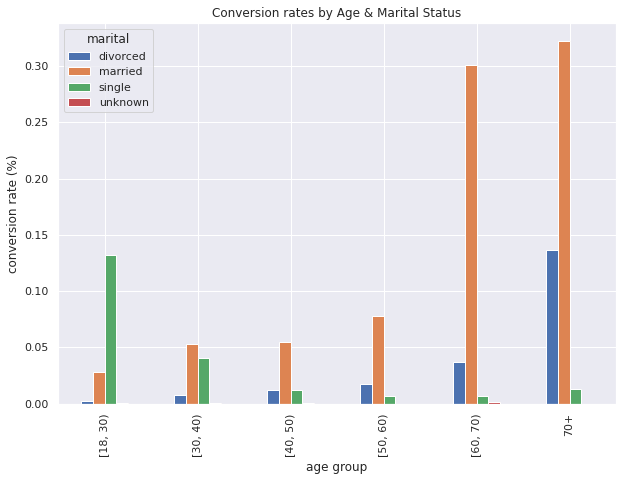

In [ ]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

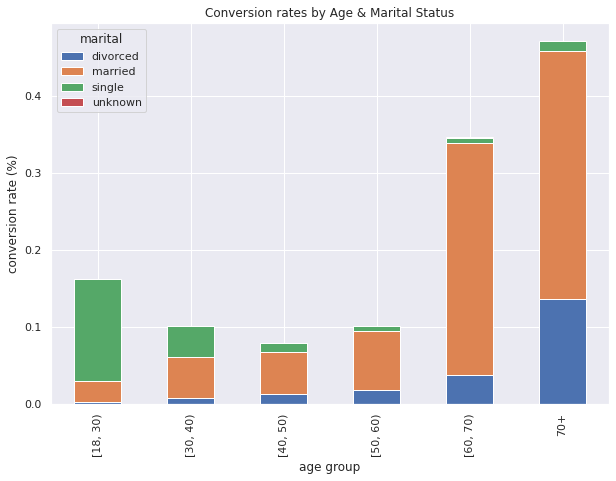

In [ ]:
ax = age_marital_df.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

Another method by pivot table

In [ ]:
a=pd.pivot_table(df,values='conversion',index='age_group',columns='marital',
               aggfunc='sum',margins=True,margins_name = 'Sub-total').fillna(0)
a

marital,divorced,married,single,unknown,Sub-total
age_group,,,,,
70+,64.0,151.0,6.0,0.0,221
"[18, 30)",12.0,158.0,751.0,1.0,922
"[30, 40)",128.0,897.0,684.0,6.0,1715
"[40, 50)",126.0,575.0,130.0,3.0,834
"[50, 60)",119.0,533.0,44.0,1.0,697
"[60, 70)",27.0,218.0,5.0,1.0,251
Sub-total,476.0,2532.0,1620.0,12.0,4640


In [ ]:
a=a.div(df.groupby(by='age_group')['conversion'].count(), axis=0 )
a

marital,divorced,married,single,unknown,Sub-total
age_group,,,,,
70+,0.136461,0.321962,0.012793,0.000000,0.471215
Sub-total,NaN,NaN,NaN,NaN,NaN
"[18, 30)",0.002117,0.027871,0.132475,0.000176,0.162639
"[30, 40)",0.007557,0.052958,0.040383,0.000354,0.101252
"[40, 50)",0.011970,0.054627,0.012350,0.000285,0.079232
"[50, 60)",0.017342,0.077674,0.006412,0.000146,0.101574
"[60, 70)",0.037293,0.301105,0.006906,0.001381,0.346685


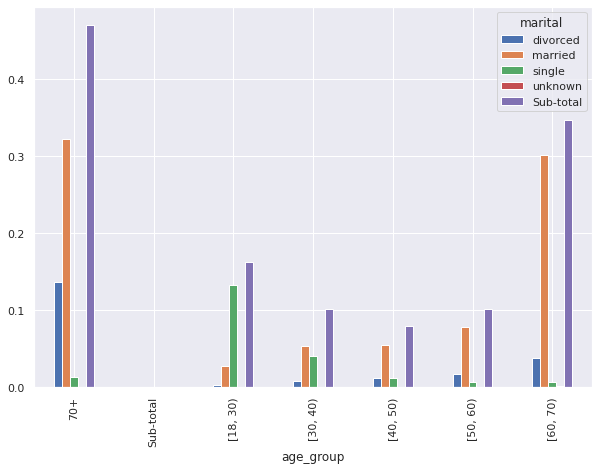

In [ ]:
a.plot(kind='bar',figsize=(10,7))

# Data from KAGGLE

Marketing Introduction:
The process by which companies create value for customers and build strong customer relationships in order to capture value from customers in return.

Kotler and Armstrong (2010).

Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.

The 4 Ps:
1) Segment of the Population: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign.

2) Distribution channel to reach the customer's place: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.)

3) Price: What is the best price to offer to potential clients? (In the case of the bank's marketing campaign this is not necessary since the main interest for the bank is for potential clients to open depost accounts in order to make the operative activities of the bank to keep on running.)

4) Promotional Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be address. This should be the last part of the marketing campaign analysis since there has to be an indepth analysis of previous campaigns (If possible) in order to learn from previous mistakes and to determine how to make the marketing campaign much more effective.

## Summary

In [ ]:
file='/content/drive/My Drive/Data/datasets_4471_6849_bank.csv'
df = pd.read_csv(file)
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)

The mean balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.

As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.

In [ ]:
df.info()
# No missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

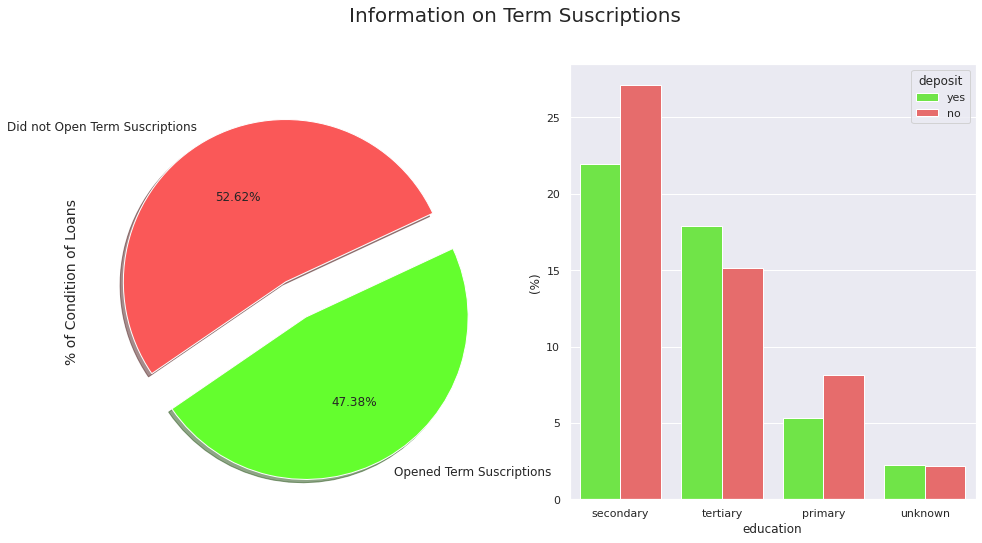

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

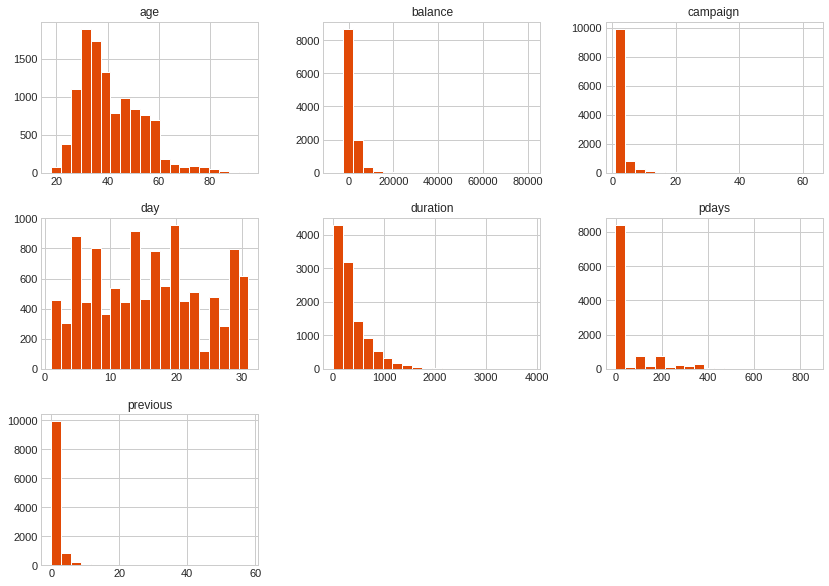

In [ ]:
# Let's see how the numeric data is distributed.
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

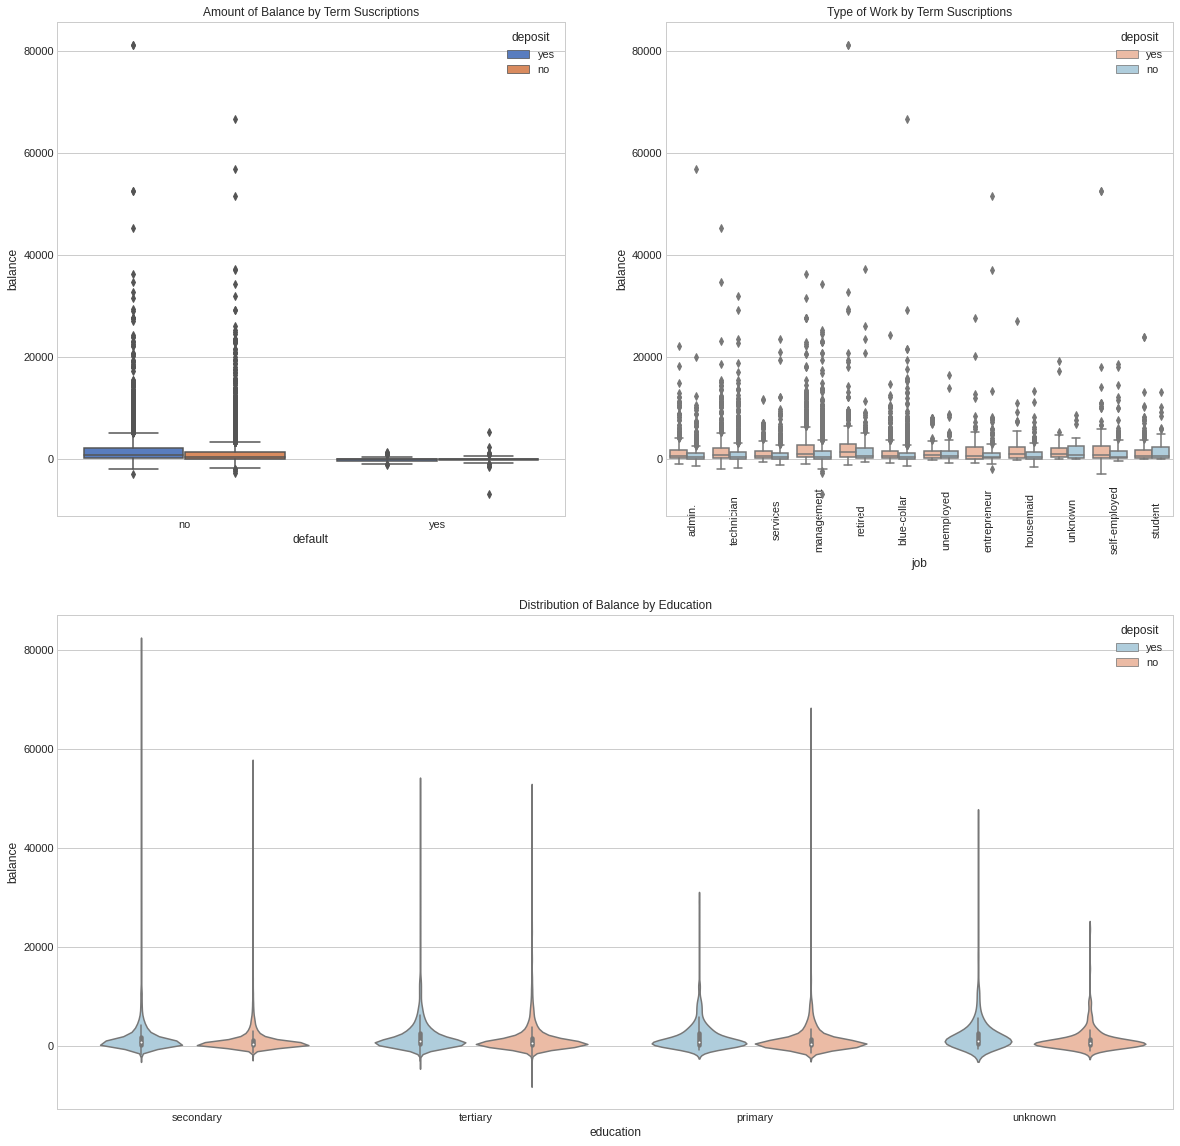

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

## Analysis by Occupation

Analysis by Occupation:
- Number of Occupations: Management is the occupation that is more prevalent in this dataset.
- Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.
- Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts.

In [ ]:
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"
#or df.loc[df['job']=='admin.','job']='management'

In [ ]:
df['job'].value_counts()

management       3900
blue-collar      1944
technician       1823
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [ ]:
!pip install squarify

In [ ]:
import squarify
df = df.drop(df.loc[df["balance"] == 0].index)

In [ ]:
x = 0
y = 0
width = 100
height = 100

job_names = df['job'].value_counts().index
values = df['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

In [ ]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [ ]:
# Balance Distribution

# Create a Balance Category
df["balance_status"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = df["balance"].loc[df["balance_status"] == "negative"].values.tolist()
low = df["balance"].loc[df["balance_status"] == "low"].values.tolist()
middle = df["balance"].loc[df["balance_status"] == "middle"].values.tolist()
high = df["balance"].loc[df["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean()


trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=16
        )
    ),
    radialaxis=dict(
        ticksuffix='%'
    ),
    orientation=270
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar-area-chart')

## Marital Status

Well in this analysis we didn't find any significant insights other than most divorced individuals are broke. No wonder since they have to split financial assets! Nevertheless, since no further insights have been found we will proceed to clustering marital status with education status. Let's see if we can find other groups of people in the sample population.

In [ ]:
df['marital'].value_counts()

married     5815
single      3336
divorced    1174
Name: marital, dtype: int64

In [ ]:
df['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [ ]:
df['marital'].value_counts().tolist()

[5815, 3336, 1174]

In [ ]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

In [ ]:
# Distribution of Balances by Marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
# Notice how divorced have a considerably low amount of balance.
fig = ff.create_facet_grid(
    df,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

In [ ]:
# Hmmm We have missed some important clients with some high balances. 
# This shouldn't be happening.
fig = ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')

## Clustering martial status and education

- Marital Status: As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.
- Education: The level of education also has a significant impact on the amount of balance a prospect has.
- Loans: Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has.

In [ ]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [ ]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status,marital/education
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low,married/secondary
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low,married/secondary
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low,married/tertiary


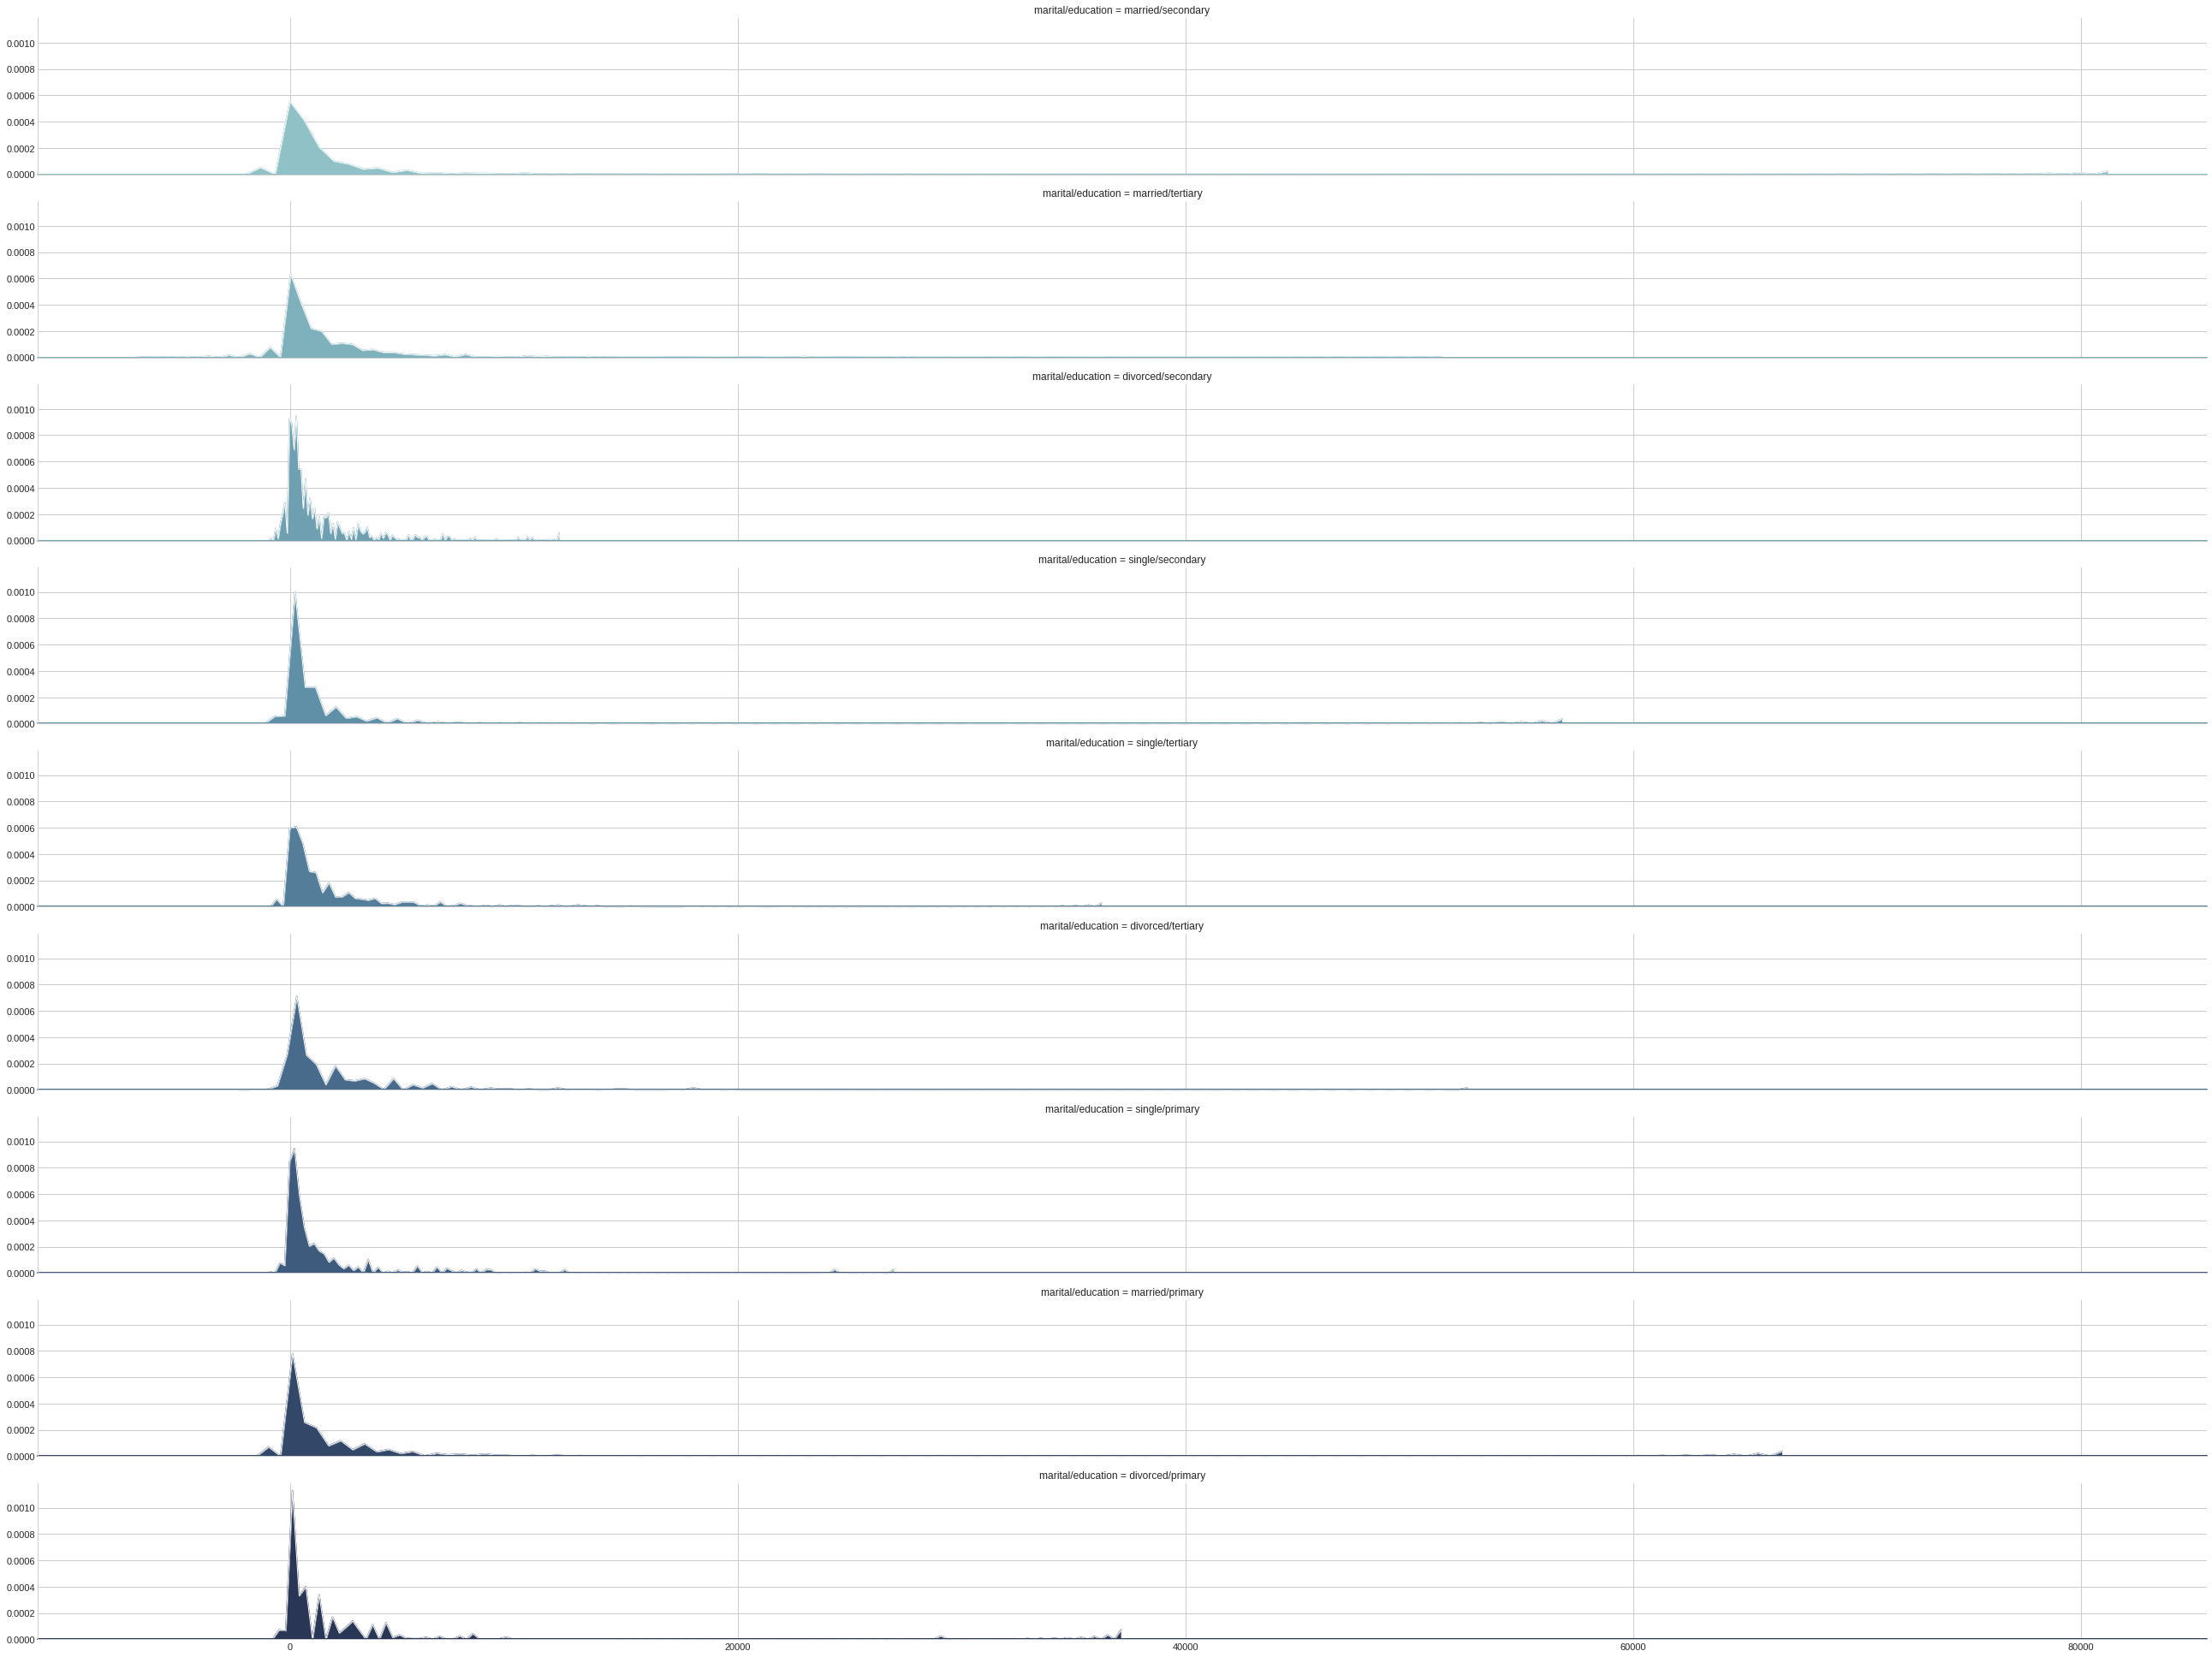

In [ ]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="marital/education", hue="marital/education", aspect=12, palette=pal)

g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw=0)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

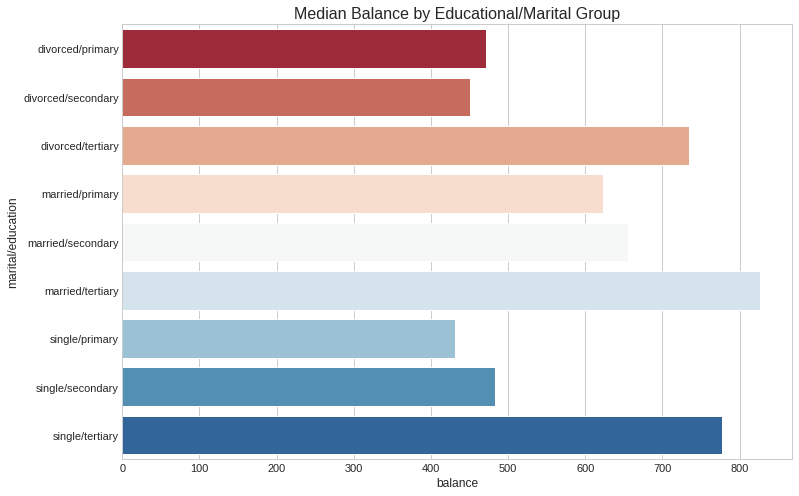

In [ ]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))




sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [ ]:
# Let's see the group who had loans from the marital/education group

loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

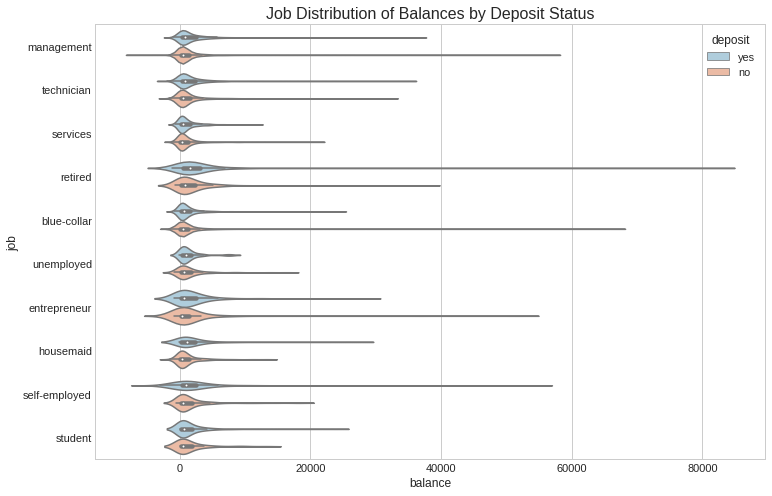

In [ ]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

## Campaign Duration

- Campaign Duration: Hmm, we see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.
- Average Campaign Duration: The average campaign duration is 374.76, let's see if clients that were above this average were more likely to open a term deposit.
- Duration Status: People who were above the duration status, were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

In [ ]:
df.drop(['marital/education', 'balance_status'], axis=1, inplace=True)

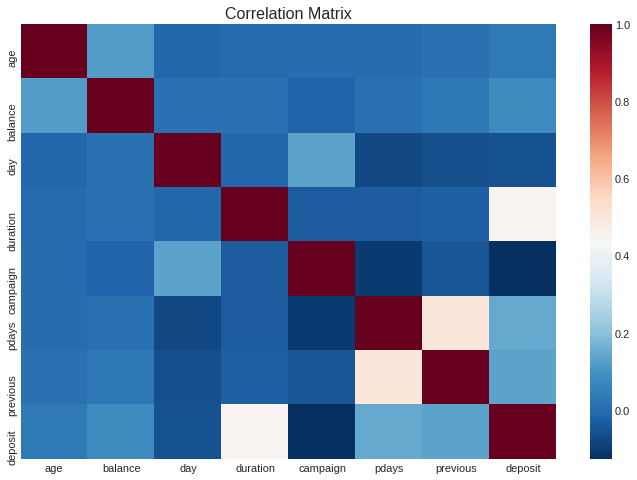

In [ ]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])



# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

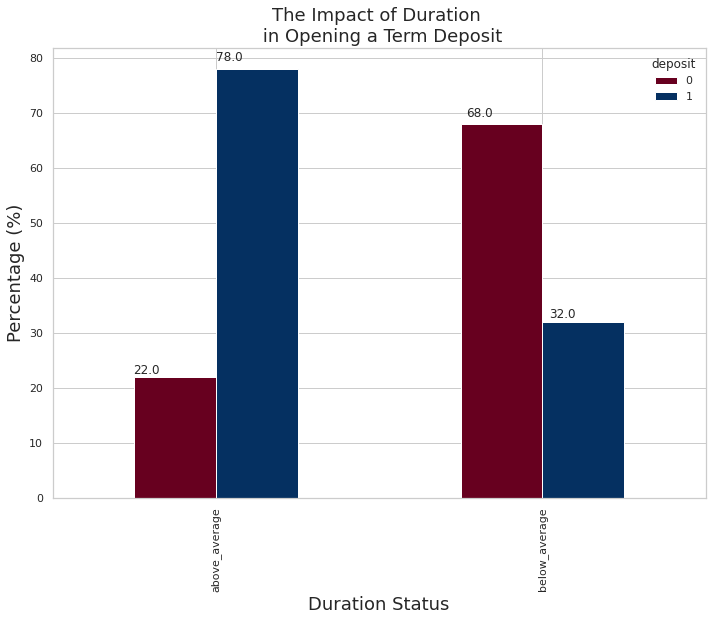

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

# Clustering

In [ ]:
!pip install fastcluster

     |████████████████████████████████| 163kB 2.4MB/s 


## Prepare Data

Data from UCI

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/llhthinker/MachineLearningLab/master/UCI%20Bank%20Marketing%20Data%20Set/data/bank-additional/bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
X=df.drop(columns=['y','duration'])
y=df['y']

In [ ]:
y=LabelEncoder().fit_transform(y)
y

array([0, 0, 0, ..., 0, 1, 0])

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


In [ ]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
X.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [ ]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
X_dummies=pd.get_dummies(X)
X_dummies

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
X_scaler=StandardScaler().fit_transform(X_dummies)
X_scaler

array([[ 1.53303429, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 1.62899323, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.29018564, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       ...,
       [ 1.53303429, -0.20490853,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 0.38152696, -0.56592197,  0.1954139 , ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 3.26029527,  0.15610492,  0.1954139 , ...,  2.94732687,
        -2.51442063, -0.1857    ]])

In [ ]:
X_scaler=pd.DataFrame(X_scaler,columns=X_dummies.columns)
X_scaler

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.19143,6.152772,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,-0.442449,-0.158872,-0.089871,-0.355097,0.807638,-0.624938,-0.044115,2.977084,-0.242748,-0.414743,-0.548100,-0.02091,-0.381918,-0.647531,-0.209453,0.513713,-0.513600,-0.008535,1.100814,-0.156933,-1.048877,0.461731,-0.156933,-0.422872,-1.31827,1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449,-0.158872,-0.089871,-0.355097,0.807638,-0.624938,-0.044115,-0.335899,-0.242748,-0.414743,1.824485,-0.02091,-0.381918,-0.647531,-0.209453,-1.946613,1.947042,-0.008535,1.100814,-0.156933,-1.048877,0.461731,-0.156933,-0.422872,-1.31827,1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449,-0.158872,-0.089871,-0.355097,0.807638,-0.624938,-0.044115,-0.335899,-0.242748,-0.414743,1.824485,-0.02091,-0.381918,-0.647531,-0.209453,0.513713,-0.513600,-0.008535,-0.908418,-0.156933,0.953401,0.461731,-0.156933,-0.422872,-1.31827,1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1.718146,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,-0.442449,-0.158872,-0.089871,-0.355097,0.807638,-0.624938,-0.044115,-0.335899,4.119506,-0.414743,-0.548100,-0.02091,-0.381918,-0.647531,-0.209453,0.513713,-0.513600,-0.008535,1.100814,-0.156933,-1.048877,0.461731,-0.156933,-0.422872,-1.31827,1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449,-0.158872,-0.089871,-0.355097,0.807638,-0.624938,-0.044115,-0.335899,-0.242748,-0.414743,1.824485,-0.02091,-0.381918,-0.647531,-0.209453,0.513713,-0.513600,-0.008535,1.100814,-0.156933,-1.048877,-2.165761,-0.156933,2.364781,-1.31827,1.31827,-0.261274,-0.420076,-0.066621,-0.459253,-0.385042,-0.115907,1.411155,-0.332532,-0.133197,-0.118462,-0.484371,1.959000,-0.514581,-0.494394,-0.496067,-0.339290,0.397706,-0.1857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## PCA

In [ ]:
X_scaler.shape

(41188, 62)

In [ ]:
n_components = X_scaler.shape[1]
#whiten = False It is default False
random_state = 2018

pca = PCA(n_components=n_components,random_state=random_state)

X_PCA = pca.fit_transform(X_scaler)
X_PCA = pd.DataFrame(X_PCA)
X_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,-2.138197,2.330096,-0.179763,1.236695,-0.552763,-1.969226,-0.384292,-0.347417,-0.308826,-0.070992,0.925928,-1.142764,-0.023432,1.310799,-0.940143,-1.105401,0.680379,0.727041,-2.423696,-1.339616,1.184557,-4.705033,-0.669608,2.313379,-0.028392,-0.184638,0.719346,0.777437,0.641440,-0.079024,-0.720165,0.809583,-0.078741,-0.968735,1.342263,-0.408202,0.101031,1.921773,-0.047093,0.091150,0.088286,0.096401,0.686340,0.106513,0.052847,0.003533,-0.224743,0.029712,-0.000455,0.024840,-0.006541,-2.347369e-14,-2.920628e-15,-4.332763e-15,7.920390e-16,4.385504e-15,-3.400012e-15,-4.843529e-15,1.135938e-15,2.335270e-16,2.091283e-16,2.166447e-16
1,-2.568068,2.570703,0.475500,-0.005332,-0.827524,-0.538063,-0.736329,-0.606169,0.738267,0.203143,3.300081,1.642320,-0.354012,-1.791166,0.587473,-1.653065,-0.574702,0.359922,-0.824464,1.140325,0.626624,-0.387899,0.543482,-0.383899,-0.066203,-0.204071,-0.264698,-0.291037,0.185309,-0.484392,-0.045751,0.206543,0.094558,0.272251,0.058014,-0.574716,0.294500,0.388857,-0.464568,0.450373,0.737109,0.054012,0.862166,-0.123156,0.923898,0.086817,-0.170464,-0.004719,0.006262,0.027739,-0.009150,2.321171e-14,-5.222951e-15,5.196029e-15,-1.547729e-14,1.246174e-14,-8.926619e-15,-4.992024e-15,3.756755e-15,1.092371e-15,1.995908e-15,-2.258715e-16
2,-1.724574,0.632799,1.440261,-0.570025,-0.715549,-0.285913,1.878135,-0.202003,-0.434576,-1.394585,2.592479,0.663744,-1.766238,-1.317583,0.074396,-1.389636,0.110579,0.458331,-1.176171,1.160889,0.376064,-0.957963,0.241821,-0.403458,-0.233573,-0.127269,-0.314674,-0.055050,0.241166,-0.425527,0.113004,0.230662,0.113591,0.143661,-0.229223,-0.723872,0.317491,0.021376,-0.469939,0.455899,0.944775,0.062596,-0.157009,-0.006807,0.188414,0.130170,-0.243538,-0.003490,0.003044,0.025118,-0.004762,-9.491835e-15,-1.869817e-15,2.810022e-17,-7.945188e-16,-1.605750e-17,-2.219075e-15,-5.813727e-15,4.325843e-15,1.342687e-16,-3.894957e-16,1.100070e-16
3,-1.919272,1.041038,1.281231,0.245346,-0.834457,-1.746133,-0.315429,-0.677517,-0.147442,0.130109,-0.434718,0.188169,-1.049242,-0.660195,-0.240229,-1.621362,-0.448280,-0.220324,-1.410002,0.185370,-1.361741,-0.610997,-1.957976,-1.398966,1.914479,1.204170,-1.059079,0.714138,-0.825523,-0.097656,-0.495886,0.668720,0.394346,-0.552810,-0.284781,-0.949426,-0.631000,1.047032,0.558338,0.419732,0.191140,0.508614,0.970504,0.049759,-1.492372,0.122572,-0.196790,0.000600,-0.004779,0.023324,-0.007046,-6.295861e-14,3.100895e-15,2.362423e-14,-3.507279e-14,7.401527e-15,3.892635e-15,1.700813e-14,5.511782e-15,-1.333800e-15,5.516289e-15,2.271057e-16
4,-1.908192,1.184773,1.546942,-0.248606,1.238380,-1.087508,0.259180,-1.128915,-2.489205,1.811757,3.248634,0.468570,-1.378004,-0.990280,0.218153,-1.361570,0.007639,0.519637,-1.175474,1.322921,0.439804,-0.705601,0.262638,-0.437629,-0.242030,-0.160535,-0.397058,-0.132667,0.183837,-0.521928,0.137084,0.237713,0.167253,0.148626,-0.326967,-0.721915,0.300534,0.342637,-0.523156,0.452089,0.753747,0.044387,1.064120,-0.043876,0.969252,0.057047,-0.214586,0.003075,0.003871,0.026490,-0.008710,6.950395e-14,1.273094e-14,-1.298085e-14,-4.434255e-15,3.368937e-15,-7.032128e-15,-2.517447e-16,1.408589e-14,2.292062e-15,-2.947183e-15,-6.814142e-17


In [ ]:
df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variant'])
df["cumpercentage"] = df['variant'].cumsum()/df['variant'].sum()*100
df

,variant,cumpercentage
0,9.650885e-02,9.650885
1,4.771994e-02,14.422879
2,4.101241e-02,18.524120
3,3.867398e-02,22.391519
4,3.733555e-02,26.125074
...,...,...
57,1.219354e-33,100.000000
58,1.136107e-33,100.000000
59,7.683105e-34,100.000000
60,5.518950e-34,100.000000


In [ ]:
trace1 = dict(type='bar',
    x=df.index,
    y=df['variant'],
    marker=dict(
        color='#2ECC71'
    ),
    name='Number of components',
    opacity=0.8
)

trace2 = dict(type='scatter',
    x=df.index,
    y=df['cumpercentage'],
    marker=dict(color='#29B6F6'),
    line=dict(color= '#29B6F6', width= 1.5),
    name='Cumulative % of Players',
    xaxis='x1', 
    yaxis='y2' 
    )

a= [trace1, trace2]

layout = go.Layout(
    title='Pareto Analysis',
    legend= dict(orientation="h"),
    xaxis=dict(
        title='Number of component',
        titlefont=dict(
            color="#2ECC71")   
              ),
    yaxis=dict(
        title='Variant',  
              ),
    yaxis2=dict(
        title='Cumulative % of component',
        titlefont=dict(
            color='#29B6F6'),
        range=[0,105],
        overlaying='y',
        anchor='x',
        side='right'
                )
      )

fig = go.Figure(data=a, layout=layout)
fig
#iplot(fig, filename="pareto")

Method 2

In [ ]:
cumpercentage=0.95
#whiten = False It is default False
random_state = 2018

pca = PCA(n_components=cumpercentage,random_state=random_state)

X_PCA = pca.fit_transform(X_scaler)
X_PCA = pd.DataFrame(X_PCA)
X_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,-2.138197,2.330096,-0.179763,1.236695,-0.552763,-1.969226,-0.384292,-0.347417,-0.308826,-0.070992,0.925928,-1.142764,-0.023432,1.310799,-0.940143,-1.105401,0.680379,0.727041,-2.423696,-1.339616,1.184557,-4.705033,-0.669608,2.313379,-0.028392,-0.184638,0.719346,0.777437,0.641440,-0.079024,-0.720165,0.809583,-0.078741,-0.968735,1.342263,-0.408202,0.101031,1.921773,-0.047093,0.091150,0.088286
1,-2.568068,2.570703,0.475500,-0.005332,-0.827524,-0.538063,-0.736329,-0.606169,0.738267,0.203143,3.300081,1.642320,-0.354012,-1.791166,0.587473,-1.653065,-0.574702,0.359922,-0.824464,1.140325,0.626624,-0.387899,0.543482,-0.383899,-0.066203,-0.204071,-0.264698,-0.291037,0.185309,-0.484392,-0.045751,0.206543,0.094558,0.272251,0.058014,-0.574716,0.294500,0.388857,-0.464568,0.450373,0.737109
2,-1.724574,0.632799,1.440261,-0.570025,-0.715549,-0.285913,1.878135,-0.202003,-0.434576,-1.394585,2.592479,0.663744,-1.766238,-1.317583,0.074396,-1.389636,0.110579,0.458331,-1.176171,1.160889,0.376064,-0.957963,0.241821,-0.403458,-0.233573,-0.127269,-0.314674,-0.055050,0.241166,-0.425527,0.113004,0.230662,0.113591,0.143661,-0.229223,-0.723872,0.317491,0.021376,-0.469939,0.455899,0.944775
3,-1.919272,1.041038,1.281231,0.245346,-0.834457,-1.746133,-0.315429,-0.677517,-0.147442,0.130109,-0.434718,0.188169,-1.049242,-0.660195,-0.240229,-1.621362,-0.448280,-0.220324,-1.410002,0.185370,-1.361741,-0.610997,-1.957976,-1.398966,1.914479,1.204170,-1.059079,0.714138,-0.825523,-0.097656,-0.495886,0.668720,0.394346,-0.552810,-0.284781,-0.949426,-0.631000,1.047032,0.558338,0.419732,0.191140
4,-1.908192,1.184773,1.546942,-0.248606,1.238380,-1.087508,0.259180,-1.128915,-2.489205,1.811757,3.248634,0.468570,-1.378004,-0.990280,0.218153,-1.361570,0.007639,0.519637,-1.175474,1.322921,0.439804,-0.705601,0.262638,-0.437629,-0.242030,-0.160535,-0.397058,-0.132667,0.183837,-0.521928,0.137084,0.237713,0.167253,0.148626,-0.326967,-0.721915,0.300534,0.342637,-0.523156,0.452089,0.753747


In [ ]:
X_PCA.shape

(41188, 41)

In [ ]:
X_scaler.shape

(41188, 62)

## Kmeans by PCA (for visualazation)

In [ ]:
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = pd.DataFrame(data=[],index=range(2,15), #21
                              columns=['inertia'])
kmeans_per_k = []
k_range = range(2,5)
for n_clusters in k_range:
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                max_iter=max_iter, tol=tol, random_state=random_state, \
                n_jobs=n_jobs)
    kmeans.fit(X_PCA)
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    kmeans_per_k.append(kmeans)

2
3
4


In [ ]:
score_df=[]
for n_clusters in k_range:
    print(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_PCA)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_PCA, preds)
    score_df.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

2
For n_clusters = 2, silhouette score is 0.11544217081289879)
3
For n_clusters = 3, silhouette score is 0.04741542699325497)
4
For n_clusters = 4, silhouette score is 0.06184865001886349)
5
For n_clusters = 5, silhouette score is 0.048503982180388754)
6
For n_clusters = 6, silhouette score is 0.07284582695318718)
7
For n_clusters = 7, silhouette score is 0.07077004675507584)
8
For n_clusters = 8, silhouette score is 0.08150216655552965)
9
For n_clusters = 9, silhouette score is 0.08797348727012089)


In [ ]:
score_df=pd.DataFrame(score_df)
score_df

,0
0,0.115442
1,0.047415
2,0.061849
3,0.048504
4,0.072846
5,0.070770
6,0.081502
7,0.087973


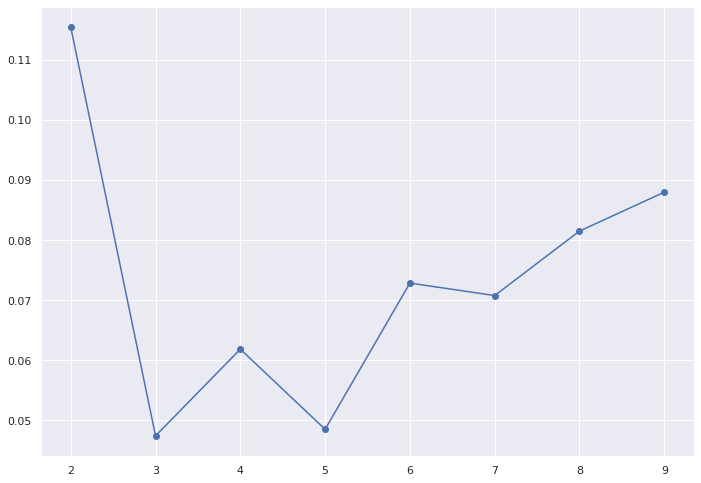

In [ ]:
plt.plot(k_range, score_df, "bo-")

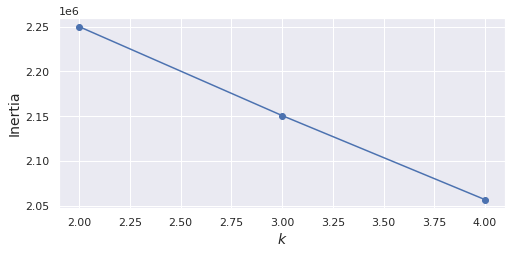

In [ ]:
#k_range = range(2,15)
inertias = [model.inertia_ for model in kmeans_per_k]
#best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#plt.plot(best_k, best_inertia, "rs")
plt.show()

In [ ]:
def plot_centroids(centroids, weights=None, circle_color='black', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

{0, 1}


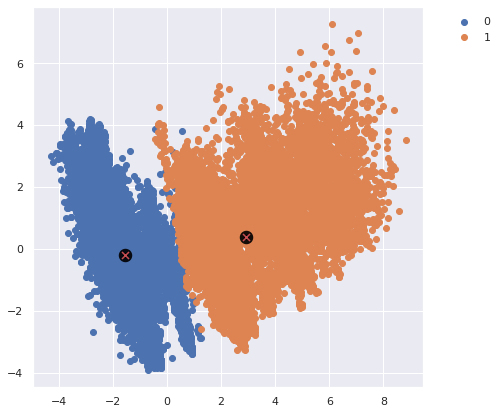

In [ ]:
clusters_number=2
kmeans = KMeans(n_clusters=clusters_number, n_init=n_init, \
                max_iter=max_iter, tol=tol, random_state=random_state, \
                n_jobs=n_jobs)
kmeans.fit(X_PCA)
cluster=kmeans.predict(X_PCA)

unique_labels = set(cluster)
print(unique_labels)

fig,ax=plt.subplots(figsize=(7,7))
for k in range(clusters_number):
  plt.scatter(X_PCA.loc[cluster==k, 0],X_PCA.loc[cluster==k, 1], 
              #edgecolor='black',
              marker='o',label=k)
plot_centroids(kmeans.cluster_centers_) # Plot center
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
clusters_number=2
kmeans = KMeans(n_clusters=clusters_number)
kmeans.fit(X_PCA)
cluster=kmeans.predict(X_PCA)

unique_labels = set(cluster)
print(unique_labels)

{0, 1}


In [ ]:
preds = pd.concat([pd.Series(y),pd.Series(cluster)], axis=1)
preds.columns = ['trueLabel','cluster']
preds

,trueLabel,cluster
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
41183,1,1
41184,0,1
41185,0,1
41186,1,1


In [ ]:
confmat = confusion_matrix(preds['trueLabel'],preds['cluster'])
print('accuracy_score: \n',accuracy_score(preds['trueLabel'], preds['cluster']))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(preds['trueLabel'], preds['cluster']))

accuracy_score: 
 0.7035787122462853
confusion_matrix 
 [[25655 10893]
 [ 1316  3324]]
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     36548
           1       0.23      0.72      0.35      4640

    accuracy                           0.70     41188
   macro avg       0.59      0.71      0.58     41188
weighted avg       0.87      0.70      0.76     41188



## Kmeans by normal X

In [ ]:
kMeans_inertia = pd.DataFrame(data=[],index=range(2,15), #21
                              columns=['inertia'])
kmeans_per_k = []
k_range = range(2,5)
for n_clusters in k_range:
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaler)
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    kmeans_per_k.append(kmeans)

2
3
4


In [ ]:
score_df=[]
for n_clusters in k_range:
    print(n_clusters)
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_scaler)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_scaler, preds)
    score_df.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

2
For n_clusters = 2, silhouette score is 0.11739858071954071)
3
For n_clusters = 3, silhouette score is 0.04841228160174839)
4
For n_clusters = 4, silhouette score is 0.06304165246990978)


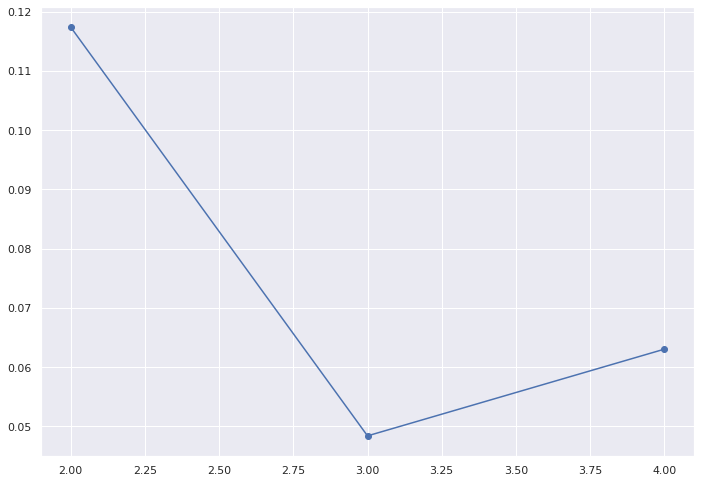

In [ ]:
score_df=pd.DataFrame(score_df)
plt.plot(k_range, score_df, "bo-")

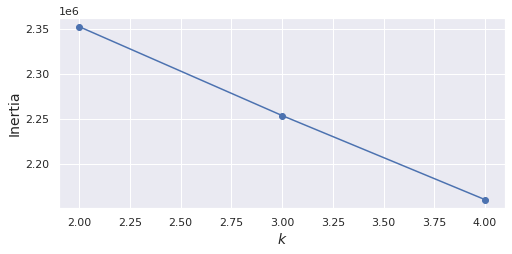

In [ ]:
#k_range = range(2,15)
inertias = [model.inertia_ for model in kmeans_per_k]
#best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#plt.plot(best_k, best_inertia, "rs")
plt.show()

### Assign result to data frame

In [ ]:
clusters_number=2
kmeans = KMeans(n_clusters=clusters_number)
kmeans.fit(X_scaler)
cluster=kmeans.predict(X_scaler)

unique_labels = set(cluster)
print(unique_labels)

{0, 1}


In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
Counter(y)

Counter({0: 36548, 1: 4640})

In [ ]:
cluster

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
Counter(cluster)

Counter({0: 26960, 1: 14228})

In [ ]:
X_scaler.shape

(41188, 62)

In [ ]:
preds = pd.concat([pd.Series(y),pd.Series(cluster)], axis=1)
preds.columns = ['trueLabel','cluster']
preds

,trueLabel,cluster
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
41183,1,1
41184,0,1
41185,0,1
41186,1,1


In [ ]:
confmat = confusion_matrix(preds['trueLabel'],preds['cluster'])
print('accuracy_score: \n',accuracy_score(preds['trueLabel'], preds['cluster']))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(preds['trueLabel'], preds['cluster']))

accuracy_score: 
 0.7033116441682044
confusion_matrix 
 [[25644 10904]
 [ 1316  3324]]
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     36548
           1       0.23      0.72      0.35      4640

    accuracy                           0.70     41188
   macro avg       0.59      0.71      0.58     41188
weighted avg       0.87      0.70      0.76     41188



## Hierarchical clustering

In [ ]:
Z = fastcluster.linkage_vector(X_scaler, \
                               method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z, \
    columns=['clusterOne','clusterTwo','distance','newClusterSize'])
Z_dataFrame

,clusterOne,clusterTwo,distance,newClusterSize
0,7.0,10.0,0.000000,2.0
1,16386.0,16388.0,0.000000,2.0
2,2048.0,2049.0,0.000000,2.0
3,16392.0,16426.0,0.000000,2.0
4,16393.0,16466.0,0.000000,2.0
...,...,...,...,...
41182,82339.0,82368.0,305.826986,10594.0
41183,82366.0,82369.0,312.620444,27830.0
41184,82367.0,82370.0,380.066720,12381.0
41185,82319.0,82371.0,420.826589,28807.0


In [ ]:
Z_dataFrame.describe()

,clusterOne,clusterTwo,distance,newClusterSize
count,41187.000000,41187.000000,41187.000000,41187.000000
mean,35664.623498,46708.376502,4.530888,18.906475
std,23646.762872,22600.597101,10.172344,352.285504
min,0.000000,10.000000,0.000000,2.000000
25%,15590.500000,28690.000000,0.549634,2.000000
50%,31864.000000,49430.000000,2.844617,3.000000
75%,55544.500000,65444.500000,5.691355,6.000000
max,82372.000000,82373.000000,535.439618,41188.000000


In [ ]:
distance_threshold = 450
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_hierClustered = clusters
print("Number of distinct clusters: ", \
      len(set(X_hierClustered)))

Number of distinct clusters:  2


In [ ]:
X_hierClustered

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
Counter(y)

Counter({0: 36548, 1: 4640})

In [ ]:
Counter(X_hierClustered)

Counter({1: 12381, 2: 28807})

In [ ]:
X_hierClustered=np.where(X_hierClustered==2, 0, X_hierClustered) 
X_hierClustered

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
Counter(X_hierClustered)

Counter({0: 28807, 1: 12381})

In [ ]:
preds = pd.concat([pd.Series(y),pd.Series(X_hierClustered)], axis=1)
preds.columns = ['trueLabel','cluster']
confmat = confusion_matrix(preds['trueLabel'],preds['cluster'])
print('accuracy_score: \n',accuracy_score(preds['trueLabel'], preds['cluster']))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(preds['trueLabel'], preds['cluster']))

accuracy_score: 
 0.7290230164125473
confusion_matrix 
 [[27097  9451]
 [ 1710  2930]]
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.74      0.83     36548
           1       0.24      0.63      0.34      4640

    accuracy                           0.73     41188
   macro avg       0.59      0.69      0.59     41188
weighted avg       0.86      0.73      0.77     41188



## DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_scaler)
distances, indices = nbrs.kneighbors(X_scaler)
distances = np.sort(distances, axis=0)

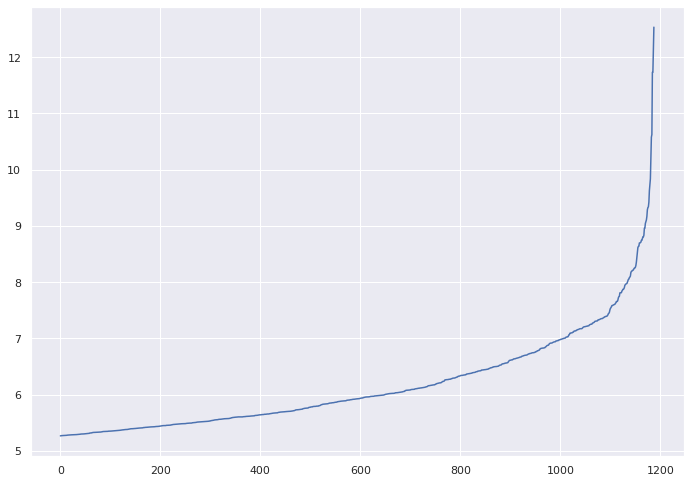

In [ ]:
distances_new = distances[40000:,1]
plt.plot(distances_new)

In [ ]:
#Very long
eps = 8
min_samples = 5
leaf_size = 30
n_jobs = 4

db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, 
            n_jobs=n_jobs)


X_dbscanClustered = db.fit_predict(X_scaler)

print("Number of distinct clusters: ", \
      len(set(X_dbscanClustered)))


## HDBSCAN

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 4.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2308436 sha256=ff7bcd006f807b1e62a8c063f9e1d630abd6b749b64524cfa9513704aaf0253f
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
min_cluster_size = 20
min_samples = 20
alpha = 1.0
cluster_selection_method = 'leaf'

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
        min_samples=min_samples, alpha=alpha, \
        cluster_selection_method=cluster_selection_method)

X_hdbscanClustered = hdb.fit_predict(X_scaler)

print("Number of distinct clusters: ", \
      len(set(X_hdbscanClustered)))


Number of distinct clusters:  373


## GMM

In [ ]:
gms_per_k =[]
for k in range(2, 4):
  print(k)
  t1=time.time()
  temp=GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X_scaler)
  gms_per_k.append(temp)
  t2=time.time()
  print(t2-t1)

2
11.945708274841309
3
15.921292543411255


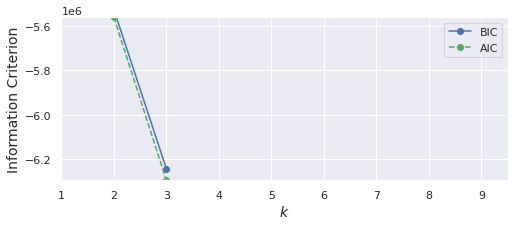

In [ ]:
bics = [model.bic(X_scaler) for model in gms_per_k]
aics = [model.aic(X_scaler) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(2,4),bics, "bo-", label="BIC")
plt.plot(range(2,4),aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.legend()
#save_fig("aic_bic_vs_k_plot")
plt.show()

In [ ]:
k=2
t1=time.time()
gmm=GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X_scaler)
t2=time.time()
print(t1-t2)

-12.255902767181396


In [ ]:
X_train_PCA_GMMClustered = gmm.predict(X_scaler)
unique_labels = set(X_train_PCA_GMMClustered)
print(unique_labels)

{0, 1}


In [ ]:
preds = pd.concat([pd.Series(y),pd.Series(X_train_PCA_GMMClustered)], axis=1)
preds.columns = ['trueLabel','cluster']
confmat = confusion_matrix(preds['trueLabel'],preds['cluster'])
print('accuracy_score: \n',accuracy_score(preds['trueLabel'], preds['cluster']))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(preds['trueLabel'], preds['cluster']))

accuracy_score: 
 0.7025104399339613
confusion_matrix 
 [[25549 10999]
 [ 1254  3386]]
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     36548
           1       0.24      0.73      0.36      4640

    accuracy                           0.70     41188
   macro avg       0.59      0.71      0.58     41188
weighted avg       0.87      0.70      0.76     41188



# Classification

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                    y, test_size=0.2, 
                                    random_state=2018, stratify=y)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(8929, 16)
(2233, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1629,71,technician,married,tertiary,no,383,no,no,cellular,27,apr,388,3,-1,0,unknown
3671,28,services,single,secondary,no,198,no,no,cellular,5,jul,128,2,-1,0,unknown
2935,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success
8532,42,management,divorced,tertiary,no,461,yes,no,unknown,3,jun,72,1,-1,0,unknown
9755,52,blue-collar,married,secondary,no,1117,yes,no,cellular,13,may,365,1,-1,0,unknown


In [ ]:
X_train_dum=pd.get_dummies(X_train)
X_test_dum=pd.get_dummies(X_test)
print(X_train_dum.shape)
print(X_test_dum.shape)

(8929, 51)
(2233, 51)


In [ ]:
X_train_scaler=StandardScaler().fit_transform(X_train_dum)
X_test_scaler=StandardScaler().fit_transform(X_test_dum)

In [ ]:
cumpercentage=0.90
random_state = 2018

pca = PCA(n_components=cumpercentage,random_state=random_state)

pca.fit(X_train_scaler)
X_train_PCA = pca.transform(X_train_scaler)
X_test_PCA = pca.transform(X_test_scaler)

X_train_PCA = pd.DataFrame(X_train_PCA)
X_test_PCA = pd.DataFrame(X_test_PCA)

In [ ]:
X_train_PCA.shape
X_test_PCA.shape

(2233, 33)

## Feature important PCA

In [ ]:
X_train_scaler.shape

(32950, 62)

In [ ]:
pca.components_.shape

(37, 62)

In [ ]:
pca.components_[0]

In [ ]:
initial_feature_names = X_dummies.columns
initial_feature_names

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [ ]:
feature_important=pd.concat([pd.Series(pca.components_[0]),
                             pd.Series(initial_feature_names)],axis=1)
feature_important.sort_values(by=0,ascending=False)

,0,1
3,0.280591,previous
42,0.236605,contact_cellular
59,0.224453,poutcome_failure
61,0.184857,poutcome_success
33,0.131366,default_no
...,...,...
5,-0.291635,cons.price.idx
60,-0.295532,poutcome_nonexistent
8,-0.341482,nr.employed
4,-0.356784,emp.var.rate


Feature important each PCA

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)] # return position index
initial_feature_names = X_dummies.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,euribor3m
1,PC1,default_unknown
2,PC2,contact_cellular
3,PC3,cons.conf.idx
4,PC4,loan_unknown
5,PC5,month_jul
6,PC6,housing_yes
7,PC7,education_professional.course
8,PC8,loan_yes
9,PC9,loan_yes


## Spot check PCA

In [ ]:
# Creating a list of the classifiers
classifiers = {
    #'KNN':KNeighborsClassifier(),   #verylong 600s with this data set ?  
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable
    'NB':GaussianNB(),
    #'SVC':SVC(), #Very Long
    #Ensemble:
    #'RF':RandomForestClassifier(), #Bagging (very long)
    #'AB':AdaBoostClassifier(),  #Boosting
    #'GBM':GradientBoostingClassifier(), #Boosting
    #'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting   
}

In [ ]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train_PCA, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


LR
time : 1.203 

LR: train_acc: 0.60 train_rec_macro: 0.60 train_prec_macro: 0.78   test_acc: 0.60 test_rec_macro: 0.60 test_prec_macro: 0.78   fit_time: 0.13
LDA
time : 1.363 

LDA: train_acc: 0.64 train_rec_macro: 0.64 train_prec_macro: 0.72   test_acc: 0.64 test_rec_macro: 0.64 test_prec_macro: 0.72   fit_time: 0.16
CART
time : 17.791 

CART: train_acc: 0.98 train_rec_macro: 0.98 train_prec_macro: 1.00   test_acc: 0.61 test_rec_macro: 0.61 test_prec_macro: 0.60   fit_time: 3.48
NB
time : 0.489 

NB: train_acc: 0.65 train_rec_macro: 0.65 train_prec_macro: 0.66   test_acc: 0.65 test_rec_macro: 0.65 test_prec_macro: 0.66   fit_time: 0.02
XGB
time : 33.146 

XGB: train_acc: 0.62 train_rec_macro: 0.62 train_prec_macro: 0.82   test_acc: 0.60 test_rec_macro: 0.60 test_prec_macro: 0.78   fit_time: 6.44
LGBM
time : 8.509 

LGBM: train_acc: 0.70 train_rec_macro: 0.70 train_prec_macro: 0.91   test_acc: 0.61 test_rec_macro: 0.61 test_prec_macro: 0.77   fit_time: 1.45


In [ ]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val.to_csv('/content/drive/My Drive/Colab Notebooks/df_results_val.csv')
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
1,LDA,0.640628,0.640628,0.719794,0.667507,0.642341,0.642341,0.721713,0.669462,0.164532,1.363043
3,NB,0.653194,0.653194,0.659002,0.655990,0.652996,0.652996,0.659261,0.655982,0.019352,0.488897
5,LGBM,0.611977,0.611977,0.767445,0.646954,0.698560,0.698560,0.910296,0.757845,1.448605,8.509007
0,LR,0.602357,0.602357,0.776223,0.636361,0.602769,0.602769,0.780247,0.637392,0.131790,1.202928
4,XGB,0.600780,0.600780,0.780768,0.634913,0.615316,0.615316,0.817407,0.655637,6.439402,33.145859
2,CART,0.607961,0.607961,0.600425,0.603884,0.983170,0.983170,0.997118,0.990012,3.483407,17.791113


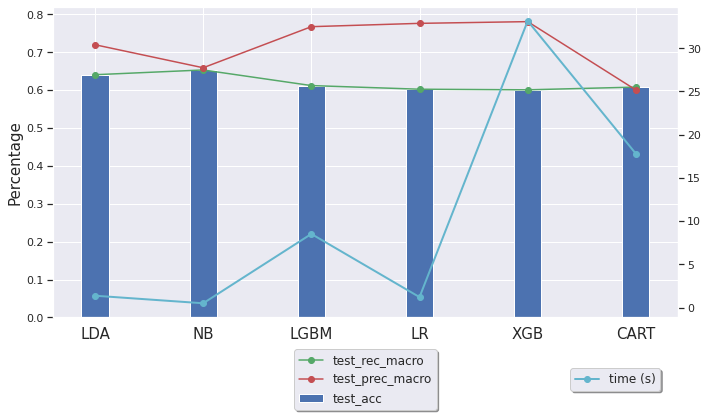

In [ ]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

## Spot check No PCA

In [ ]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train_scaler, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


LR
time : 2.606 

LR: train_acc: 0.61 train_rec_macro: 0.61 train_prec_macro: 0.79   test_acc: 0.61 test_rec_macro: 0.61 test_prec_macro: 0.79   fit_time: 0.42
LDA
time : 2.096 

LDA: train_acc: 0.67 train_rec_macro: 0.67 train_prec_macro: 0.72   test_acc: 0.66 test_rec_macro: 0.66 test_prec_macro: 0.72   fit_time: 0.31
CART
time : 1.721 

CART: train_acc: 0.98 train_rec_macro: 0.98 train_prec_macro: 1.00   test_acc: 0.62 test_rec_macro: 0.62 test_prec_macro: 0.61   fit_time: 0.27
NB
time : 0.650 

NB: train_acc: 0.72 train_rec_macro: 0.72 train_prec_macro: 0.60   test_acc: 0.72 test_rec_macro: 0.72 test_prec_macro: 0.60   fit_time: 0.03
XGB
time : 19.983 

XGB: train_acc: 0.62 train_rec_macro: 0.62 train_prec_macro: 0.82   test_acc: 0.61 test_rec_macro: 0.61 test_prec_macro: 0.79   fit_time: 3.82
LGBM
time : 6.981 

LGBM: train_acc: 0.66 train_rec_macro: 0.66 train_prec_macro: 0.86   test_acc: 0.63 test_rec_macro: 0.63 test_prec_macro: 0.78   fit_time: 1.16


In [ ]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val.to_csv('/content/drive/My Drive/Colab Notebooks/df_results_val.csv')
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
1,LDA,0.664904,0.664904,0.720846,0.686722,0.666216,0.666216,0.723783,0.688728,0.308766,2.095630
5,LGBM,0.628210,0.628210,0.781446,0.666263,0.663990,0.663990,0.855576,0.714323,1.160345,6.980538
4,XGB,0.606532,0.606532,0.794224,0.642951,0.615459,0.615459,0.817191,0.655774,3.815759,19.982607
0,LR,0.606337,0.606337,0.787313,0.642179,0.608672,0.608672,0.791581,0.645454,0.416048,2.606315
2,CART,0.622664,0.622664,0.613615,0.617796,0.983170,0.983170,0.997118,0.990012,0.270417,1.721350
3,NB,0.716321,0.716321,0.599367,0.595800,0.717548,0.717548,0.600185,0.597093,0.033165,0.649860


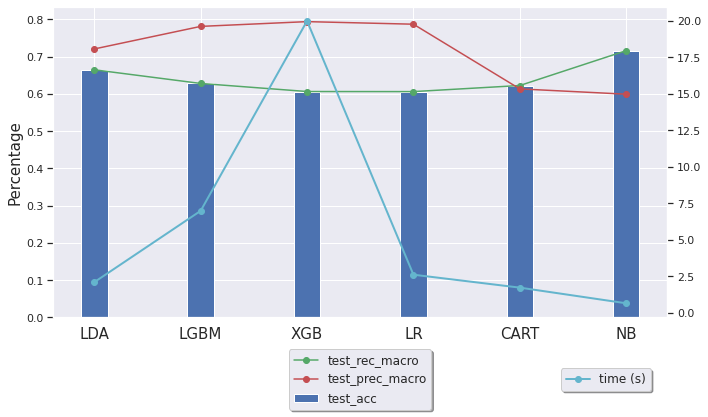

In [ ]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
test_f1_macro=df_results_val['test_f1_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')
rects4 = ax.plot(x, test_prec_macro, color = 'y',marker='o',label='test_f1_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

Conclusion: No PCA is slight better ~2% f1 score

## Best: LDA (no pca)

In [ ]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train_scaler,y_train)
y_pred=lda.predict(X_test_scaler)
y_pred_probs=lda.predict_proba(X_test_scaler)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)
print('average_precision',average_precision)
print('AUC',areaUnderROC)
print('classification_report \n',classification_report(y_test, y_pred))

average_precision 0.8739745060116452
AUC 0.9042191207818847
classification_report 
               precision    recall  f1-score   support

           0       0.79      0.89      0.83      1175
           1       0.85      0.74      0.79      1058

    accuracy                           0.81      2233
   macro avg       0.82      0.81      0.81      2233
weighted avg       0.82      0.81      0.81      2233



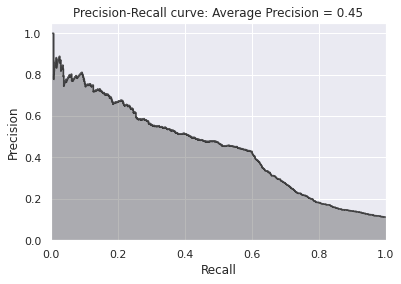

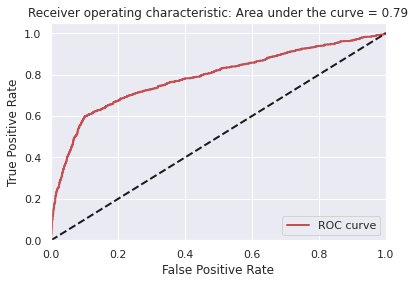

In [ ]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## LGBM (no PCA)

### Standard scaler all

In [ ]:
lgbm=LGBMClassifier()
lgbm.fit(X_train_scaler,y_train)
y_pred=lgbm.predict(X_test_scaler)
y_pred_probs=lgbm.predict_proba(X_test_scaler)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)
print('average_precision',average_precision)
print('AUC',areaUnderROC)
print('classification_report \n',classification_report(y_test, y_pred))

average_precision 0.9015856196397218
AUC 0.9307678075855689
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1175
           1       0.83      0.90      0.86      1058

    accuracy                           0.87      2233
   macro avg       0.87      0.87      0.87      2233
weighted avg       0.87      0.87      0.87      2233



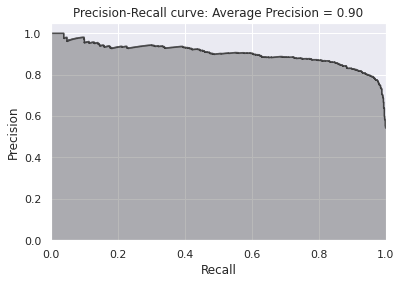

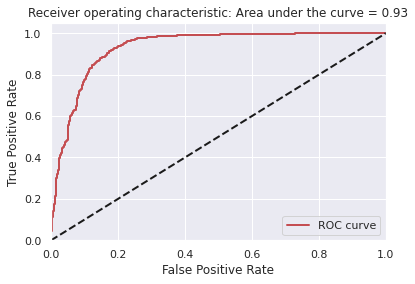

In [ ]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

### Standar scaler only numeric (result is the same as above)

In [ ]:
X.shape

(11162, 16)

In [ ]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [ ]:
category_feature=X.select_dtypes(include=object).columns
category_feature

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
numeric_feature=X.select_dtypes(exclude=object).columns
numeric_feature

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
#Standard scaler all numeric value
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
numeric_features = X.select_dtypes(exclude=object).columns

#One hot encoder all category value
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
categorical_features = X.select_dtypes(include=object).columns

transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categoric', categorical_transformer, categorical_features),
    #('numeric', numeric_transformer, selector(dtype_exclude="object")),
    #('categoric', categorical_transformer, selector(dtype_include="object")),
    #('imputer', imputer_transformer, numeric_features),  
]
preprocessor = ColumnTransformer(transformers)

In [ ]:
# Create transform X value
X_test_tran_new=preprocessor.fit_transform(X_test)
X_train_tran_new=preprocessor.fit_transform(X_train)
X_train_tran_new

array([[ 2.49275305, -0.36242321,  1.34893046, ...,  0.        ,
         0.        ,  1.        ],
       [-1.11480464, -0.42197943, -1.27789681, ...,  0.        ,
         0.        ,  1.        ],
       [-1.95377154, -0.28998998, -0.3226869 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.23430269, -0.50020732,  1.70713417, ...,  0.        ,
         0.        ,  1.        ],
       [-1.11480464, -0.31670979,  0.8713255 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.52752781, -0.55074963,  0.51312178, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
X_train_tran_new.shape

(8929, 51)

In [ ]:
# Keep track transformer colum names:
def get_transformer_feature_names(columnTransformer): #mean: preprocessor 

    output_features = []

    for name, pipe, features in columnTransformer.transformers_:
        if name!='remainder':
            for i in pipe:
                trans_features = []
                if hasattr(i,'categories_'):
                    trans_features.extend(i.get_feature_names(features))
                else:
                    trans_features = features
            output_features.extend(trans_features)

    return output_features
print(len(get_transformer_feature_names(preprocessor)))
#get_transformer_feature_names(preprocessor)

51


In [ ]:
#Apply name to X_train and X_test after transformer
X_train_tran_df=pd.DataFrame(X_train_tran_new, 
             columns=get_transformer_feature_names(preprocessor))
X_test_tran_df=pd.DataFrame(X_test_tran_new, 
             columns=get_transformer_feature_names(preprocessor))
X_train_tran_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2.492753,-0.362423,1.348930,0.046885,0.175967,-0.481419,-0.357814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.114805,-0.421979,-1.277897,-0.714278,-0.187066,-0.481419,-0.357814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.953772,-0.289990,-0.322687,-0.474219,-0.550099,0.377145,0.068119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.059749,-0.337313,-1.516699,-0.878221,-0.550099,-0.481419,-0.357814,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.898716,-0.126130,-0.322687,-0.020448,-0.550099,-0.481419,-0.357814,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
lgbm=LGBMClassifier()
lgbm.fit(X_train_tran_df,y_train)
y_pred=lgbm.predict(X_test_tran_df)
y_pred_probs=lgbm.predict_proba(X_test_tran_df)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)
print('average_precision',average_precision)
print('AUC',areaUnderROC)
print('classification_report \n',classification_report(y_test, y_pred))

average_precision 0.9015856196397218
AUC 0.9307678075855689
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1175
           1       0.83      0.90      0.86      1058

    accuracy                           0.87      2233
   macro avg       0.87      0.87      0.87      2233
weighted avg       0.87      0.87      0.87      2233



Conclusion: the same with scale all everything (include one hot)

In [ ]:
print('accuracy_score',accuracy_score(y_test, y_pred))
print('precision_score',precision_score(y_test, y_pred,average='macro'))
print('recall_score',recall_score(y_test, y_pred,average='macro'))
print('f1_score',f1_score(y_test, y_pred,average='macro'))

accuracy_score 0.8652037617554859
precision_score 0.8665429808286951
recall_score 0.867114990146
f1_score 0.8651929475365376


In [ ]:
y_train_pred=lgbm.predict(X_train_tran_df)
print('accuracy_score',accuracy_score(y_train, y_train_pred))
print('precision_score',precision_score(y_train, y_train_pred,average='macro'))
print('recall_score',recall_score(y_train, y_train_pred,average='macro'))
print('f1_score',f1_score(y_train, y_train_pred,average='macro'))

accuracy_score 0.9108522790906036
precision_score 0.9112821844531089
recall_score 0.9123345758600867
f1_score 0.9108188010627035


### Feature important

In [ ]:
imp_vals=lgbm.feature_importances_
imp_vals

array([296, 387, 357, 484, 132, 205,  45,  19,  17,   2,  12,  11,   2,
        14,   6,   7,  17,   6,   4,  13,  29,  24,  12,  16,  37,   9,
         4,   0,  62,   6,  31,   0,  32,   4,  64,  51,  35,  23,  60,
        27,  48,  60,  50,  67,  47,  54,  27,  12,   9,  63,   1])

In [ ]:
varimp_grid_df=pd.DataFrame({'feature': X_train_tran_df.columns, 'importance': imp_vals})
varimp_grid_df=varimp_grid_df.sort_values(by='importance',ascending=False)
varimp_grid_df.head(10)

,feature,importance
3,duration,484
1,balance,387
2,day,357
0,age,296
5,pdays,205
4,campaign,132
43,month_may,67
34,contact_unknown,64
49,poutcome_success,63
28,housing_no,62


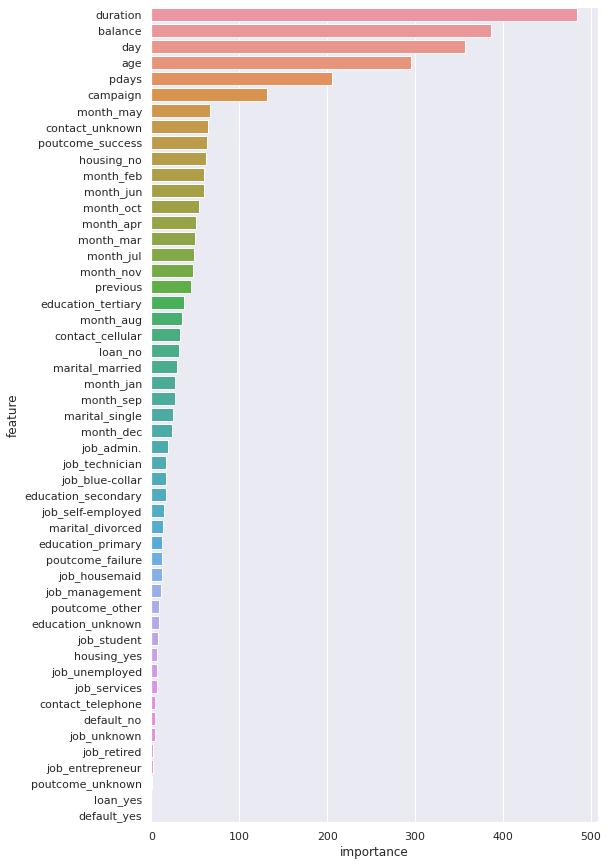

In [ ]:
fig,ax=plt.subplots(figsize=(8,15))
sns.barplot(x='importance',y='feature',data=varimp_grid_df,ax=ax)
plt.show()

In [ ]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 74kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=7dee01153ac771664f7062d270b8108e5b622f030d331f0bfc3bb11866c65344
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [ ]:
X_test_tran_df.shape

(8238, 62)

In [ ]:
X_train_tran_df.shape

(32950, 62)

In [ ]:
from pdpbox import pdp, info_plots #for partial plots

n=len(X_train_tran_df.columns)
i=0
#fig, ax = plt.subplots(n,figsize=(10,30))
#fig.suptitle('Vertically stacked subplots')
base_features = X_train_tran_df.columns.values.tolist()

for name in X_train_tran_df.columns:
  feat_name = name
  pdp_dist = pdp.pdp_isolate(model=lgbm, dataset=X_test_tran_df, model_features=base_features, feature=feat_name)
  pdp.pdp_plot(pdp_dist, feat_name)
  #i+=1

plt.tight_layout()
#plt.savefig('image2.png')
plt.show()

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394114 sha256=5f0cc2ed39bbe2838dd8c4729dd8ba7bdca0511865935083a07667ed97d8db6a
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


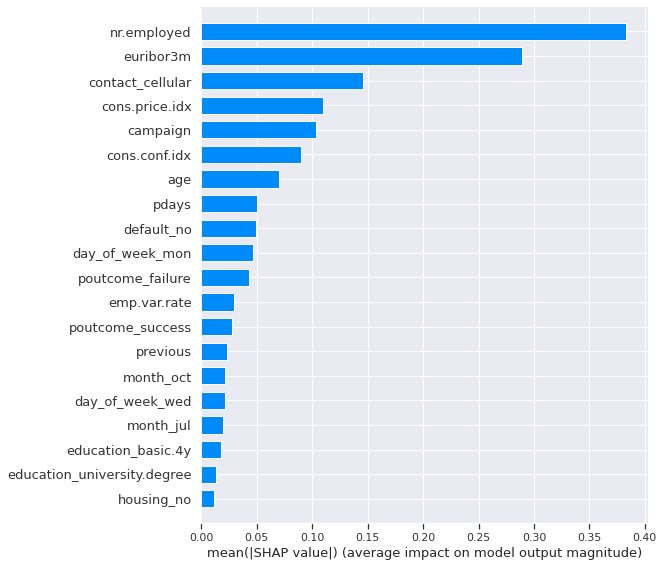

In [ ]:
model = lgbm
#model = RandomForestClassifier(max_depth=5)
#model.fit(X_train_tran_df, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_tran_df)

shap.summary_plot(shap_values[1], X_test_tran_df, plot_type="bar")

In [ ]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


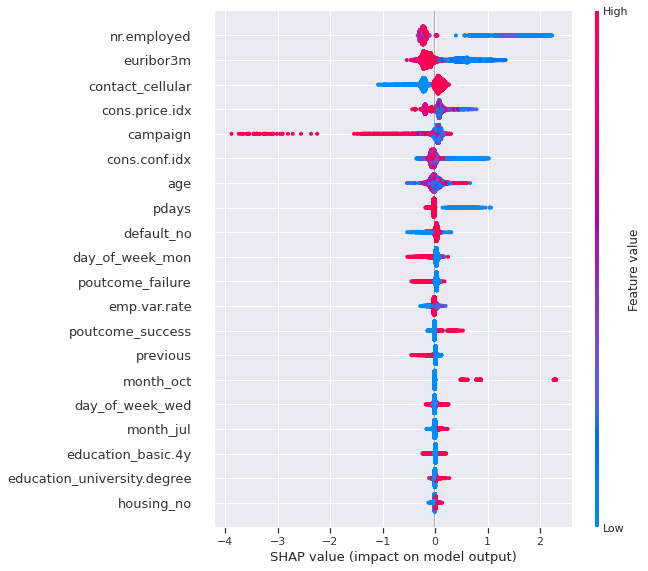

In [ ]:
shap.summary_plot(shap_values[1], X_test_tran_df)

## Voting essemble

Max Voting : The max voting method works on the principle of majority rule. In this method, the opinion of the majority rules the roost. In this technique, individual models, or, in ensemble learning jargon, individual learners, are fit on the training set and their predictions are then generated on the test set. Each individual learner's prediction is considered to be a vote. On the test set, whichever class gets the maximum vote is the ultimate winner. Let's demonstrate this with a toy example.

In [ ]:
scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

kfold = KFold(n_splits=5, shuffle=True)
# create the sub models
estimators = []
model1 = LGBMClassifier()
estimators.append(('LGBM', model1))
model2 = LogisticRegression()
estimators.append(('LR', model2))
model3 = GaussianNB()
estimators.append(('NB', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_validate(ensemble, X_train_scaler, y_train, cv=kfold,
                         scoring=scoring,return_train_score=True,
                          return_estimator=True)

In [ ]:
  print("train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (results['train_accuracy'].mean(),results['train_recall'].mean(),results['train_precision'].mean(),
       results['test_accuracy'].mean(),results['test_recall'].mean(),results['test_precision'].mean(),
       results['fit_time'].mean()))

train_acc: 0.66 train_rec_macro: 0.66 train_prec_macro: 0.82 test_acc: 0.64 test_rec_macro: 0.64 test_prec_macro: 0.77 fit_time: 1.54


In [ ]:
results['estimator'][0]

VotingClassifier(estimators=[('LGBM',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                             subsa...
                              LogisticRegression(C=1.0, cl

In [ ]:
model=results['estimator'][0]
y_pred=model.predict(X_test_scaler)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.20      0.31       928

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



In [ ]:
estimators = []
model1 = LGBMClassifier()
estimators.append(('LGBM', model1))
model2 = LogisticRegression()
estimators.append(('LR', model2))
model3 = GaussianNB()
estimators.append(('NB', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_scaler,y_train)
y_pred=ensemble.predict(X_test_scaler)
print('classification_report \n',classification_report(y_test, y_pred))


classification_report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.67      0.20      0.31       928

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



## Boosting

In [ ]:
# Defining the base learner (from Data science workshop)

bl1 = LogisticRegression()

# Defining the boosting meta learner
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(base_estimator=bl1, n_estimators=300)

# Fitting the model on the training set
Boosting = boosting.fit(X_train_scaler, y_train)

# Getting the predictions from the boosting model
pred = Boosting.predict(X_test_scaler)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.64      0.23      0.34       928

    accuracy                           0.90      8238
   macro avg       0.78      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



## Bagging (long time)

In [ ]:
# create the ensemble model
model = ExtraTreesClassifier()
model.fit(X_train_scaler,y_train)
y_pred=model.predict(X_test_scaler)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7310
           1       0.49      0.31      0.38       928

    accuracy                           0.89      8238
   macro avg       0.70      0.63      0.66      8238
weighted avg       0.87      0.89      0.87      8238



In [ ]:
# create the ensemble model
model = RandomForestClassifier()
model.fit(X_train_scaler,y_train)
y_pred=model.predict(X_test_scaler)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.55      0.28      0.37       928

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



In [ ]:
num_feature=len(pd.DataFrame(X_train_scaler).columns)
num_feature

62

In [ ]:
# create the ensemble model
num_trees = 500
max_features = num_feature
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train_scaler,y_train)
y_pred=model.predict(X_test_scaler)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7310
           1       0.48      0.31      0.38       928

    accuracy                           0.88      8238
   macro avg       0.70      0.64      0.66      8238
weighted avg       0.87      0.88      0.87      8238



In [ ]:
round(np.sqrt(num_feature)).astype('int')

8

In [ ]:
# create the ensemble model
num_trees = 500
n = round(np.sqrt(num_feature)).astype('int')
model = RandomForestClassifier(n_estimators=num_trees, max_features=n)
model.fit(X_train_scaler,y_train)
y_pred=model.predict(X_test_scaler)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.57      0.30      0.39       928

    accuracy                           0.90      8238
   macro avg       0.74      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238



## Stacking

In [ ]:
bl1 = LinearDiscriminantAnalysis()
bl2 = LGBMClassifier() 
bl3= GaussianNB()
ml = LogisticRegression()

# Creating the stacking classifier
from mlxtend.classifier import StackingClassifier
stackclf = StackingClassifier(classifiers=[bl1, bl2,bl3], 
                          meta_classifier=ml)
# Fitting the model on the training set
Stackclf = stackclf.fit(X_train_scaler, y_train)

# Getting the predictions from the boosting model
pred = Stackclf.predict(X_test_scaler)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.63      0.27      0.38       928

    accuracy                           0.90      8238
   macro avg       0.77      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238



## Deep learning

In [ ]:
import tensorflow as tf
from tensorflow import keras

X_train_a, X_test, y_train_a, y_test = train_test_split(X_dummies,y, test_size=0.3, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.3, 
                                    random_state=2018, stratify=y_train_a)
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.fit_transform(X_val)
X_test=scaler.fit_transform(X_test)
X_train_a=scaler.fit_transform(X_train_a)

(41188, 19)
(20181, 62)
(8650, 62)
(12357, 62)


In [ ]:
def plot_loss(history, label):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               #color=colors[n], 
               label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          #color=colors[n], 
          label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
tf.random.set_seed(42)
np.random.seed(42)

DROPOUT = 0.3
numlabel=1
#output_bias=0.5
#build the model
#----input-------#
model =Sequential()
model.add(Dense(16,input_dim=X_train.shape[1],activation='relu'))
model.add(Dropout(DROPOUT))
#----hiden layer-------#
#model.add(Dense(40,activation='relu'))
#model.add(Dropout(DROPOUT))
#model.add(Dense(20,activation='relu'))
#model.add(Dropout(DROPOUT))
#----output-------#
model.add(Dense(numlabel,activation='sigmoid',  #binary: sigmoid. multi: softmax
                #bias_initializer=output_bias
                )) 
model.summary()
# compiling the model
model.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1008      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# network and training
EPOCHS = 200
BATCH_SIZE = 1000 #

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3, # patient =3
                           #mode='max',restore_best_weights=True #Not include as normal
                           ),
            #ModelCheckpoint(filepath="best_model.h5",
            #                monitor="val_auc",
            #                save_best_only=True)
            ]
#training the moodel
result=model.fit(X_train, y_train,
                batch_size=BATCH_SIZE, epochs=EPOCHS,
                callbacks=callbacks,
                validation_data=(X_val, y_val),
                verbose=0)

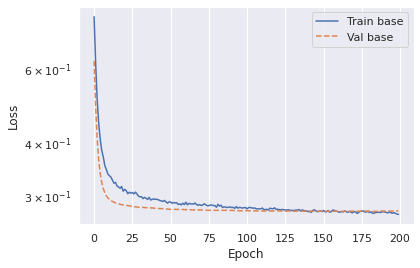

In [ ]:
plot_loss(result,'base')

In [ ]:
predictions=model.predict_classes(X_test)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10965
           1       0.64      0.24      0.35      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



### Tunning Threshold

areaUnderROC 0.7915892678103864
(1487,)
Best Threshold=0.118856, G-Mean=0.741


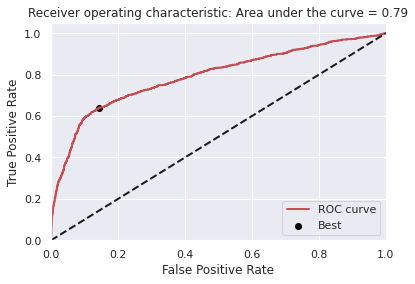

In [ ]:
prediction_proba_val=model.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val,prediction_proba_val)
areaUnderROC = auc(fpr, tpr)
print('areaUnderROC',areaUnderROC)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold_1=thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold_1, gmeans[ix]))
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Base on threshold from X val
prediction_proba_test=model.predict(X_test)
y_pred_new = [1 if x >= best_threshold_1 else 0 for x in prediction_proba_test]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.8277089908553856
confusion_matrix 
 [[9341 1624]
 [ 505  887]]
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     10965
           1       0.35      0.64      0.45      1392

    accuracy                           0.83     12357
   macro avg       0.65      0.74      0.68     12357
weighted avg       0.88      0.83      0.85     12357



average_precision 0.4594514118526142
Best Threshold=0.223447, F-Score=0.502


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.46')

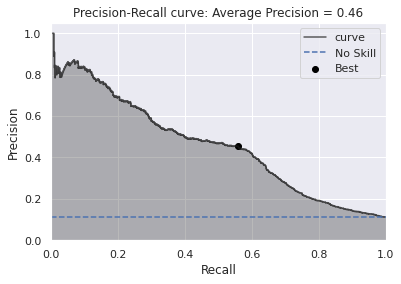

In [ ]:
prediction_proba_val=model.predict(X_val)
precision, recall, thresholds = precision_recall_curve(y_val,prediction_proba_val)
average_precision = average_precision_score(y_val,prediction_proba_val)
print("average_precision",average_precision)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
best_threshold_2=thresholds[ix]
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold_2, fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.step(recall, precision, color='k', alpha=0.7, where='post',label='curve')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [ ]:
# Base on threshold from X val
prediction_proba_test=model.predict(X_test)
y_pred_new = [1 if x >= best_threshold_2 else 0 for x in prediction_proba_test]
confmat = confusion_matrix(y_test,y_pred_new)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_new))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_new))

accuracy_score: 
 0.8753742817836044
confusion_matrix 
 [[10044   921]
 [  619   773]]
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     10965
           1       0.46      0.56      0.50      1392

    accuracy                           0.88     12357
   macro avg       0.70      0.74      0.71     12357
weighted avg       0.89      0.88      0.88     12357



# New method (one hot , no scaler), No different with above method

In [ ]:
file='/content/drive/My Drive/Data/datasets_4471_6849_bank.csv'
df = pd.read_csv(file)
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
X=df.drop(columns='deposit')
y=df.deposit

In [ ]:
y=LabelEncoder().fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                    y, test_size=0.2, 
                                    random_state=2018, stratify=y)
print(X_train.shape)
print(X_test.shape)

(8929, 16)
(2233, 16)


In [ ]:
X_train_dum=pd.get_dummies(X_train)
X_test_dum=pd.get_dummies(X_test)
X_train_dum

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1629,71,383,27,388,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3671,28,198,5,128,2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2935,18,608,13,210,1,93,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8532,42,461,3,72,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
9755,52,1117,13,365,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,35,805,17,613,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7294,31,609,14,1126,1,335,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10965,56,-45,30,116,6,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6773,28,525,23,81,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
svc = SVC(gamma=0.001)
svc.fit(X_train_dum, y_train)
svc_pred = svc.predict(X_test_dum)

print(confusion_matrix(y_test,svc_pred))
print('accuracy_score:',accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[816 359]
 [241 817]]
accuracy_score: 0.7313031795790417
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1175
           1       0.69      0.77      0.73      1058

    accuracy                           0.73      2233
   macro avg       0.73      0.73      0.73      2233
weighted avg       0.74      0.73      0.73      2233



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_dum, y_train)
rfc_pred = rfc.predict(X_test_dum)

print(confusion_matrix(y_test,rfc_pred))
print('Accuracy score:',accuracy_score(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[978 197]
 [143 915]]
Accuracy score: 0.8477384684281236
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1175
           1       0.82      0.86      0.84      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



In [ ]:
# Creating a list of the classifiers
classifiers = {
    #'KNN':KNeighborsClassifier(),   #verylong 600s with this data set ?  
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable
    'NB':GaussianNB(),
    'SVC':SVC(), #Very Long
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging (very long)
    'AB':AdaBoostClassifier(),  #Boosting
    'GBM':GradientBoostingClassifier(), #Boosting
    'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting   
}

In [ ]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train_dum, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


LR


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

time : 1.344 

LR: train_acc: 0.79 train_rec_macro: 0.79 train_prec_macro: 0.79   test_acc: 0.79 test_rec_macro: 0.79 test_prec_macro: 0.79   fit_time: 0.22
LDA
time : 0.814 

LDA: train_acc: 0.82 train_rec_macro: 0.82 train_prec_macro: 0.82   test_acc: 0.81 test_rec_macro: 0.81 test_prec_macro: 0.82   fit_time: 0.12
CART
time : 0.546 

CART: train_acc: 1.00 train_rec_macro: 1.00 train_prec_macro: 1.00   test_acc: 0.79 test_rec_macro: 0.79 test_prec_macro: 0.79   fit_time: 0.08
NB
time : 0.236 

NB: train_acc: 0.73 train_rec_macro: 0.73 train_prec_macro: 0.75   test_acc: 0.73 test_rec_macro: 0.73 test_prec_macro: 0.75   fit_time: 0.01
SVC
time : 40.367 

SVC: train_acc: 0.74 train_rec_macro: 0.74 train_prec_macro: 0.75   test_acc: 0.73 test_rec_macro: 0.73 test_prec_macro: 0.74   fit_time: 4.20
RF
time : 5.903 

RF: train_acc: 1.00 train_rec_macro: 1.00 train_prec_macro: 1.00   test_acc: 0.85 test_rec_macro: 0.85 test_prec_macro: 0.85   fit_time: 0.96
AB
time : 3.038 

AB: train_acc: 0

In [ ]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
10,LGBM,0.861527,0.861527,0.860617,0.860267,0.919806,0.919806,0.918715,0.918322,0.229842,1.631131
5,RF,0.853038,0.853038,0.852118,0.851856,1.000000,1.000000,1.000000,1.000000,0.961055,5.903105
7,GBM,0.845783,0.845783,0.845046,0.844942,0.861481,0.861481,0.860584,0.860742,1.499084,7.720506
9,XGB,0.843513,0.843513,0.842753,0.842700,0.858321,0.858321,0.857360,0.857391,0.967343,5.154489
6,AB,0.821067,0.821067,0.822555,0.821549,0.828943,0.828943,0.830634,0.829511,0.463359,3.038321
8,ET,0.818115,0.818115,0.818282,0.818143,1.000000,1.000000,1.000000,1.000000,0.948088,6.177732
1,LDA,0.811465,0.811465,0.818294,0.812629,0.815543,0.815543,0.822015,0.816732,0.118469,0.813518
0,LR,0.787835,0.787835,0.788627,0.788063,0.793205,0.793205,0.793943,0.793489,0.222610,1.344325
2,CART,0.786945,0.786945,0.787489,0.787127,1.000000,1.000000,1.000000,1.000000,0.080613,0.545889
3,NB,0.733530,0.733530,0.746715,0.733485,0.734803,0.734803,0.747523,0.734865,0.013188,0.235985


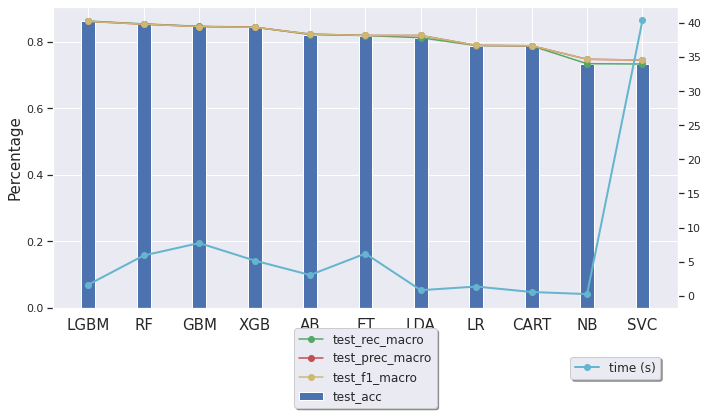

In [ ]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
test_f1_macro=df_results_val['test_f1_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')
rects4 = ax.plot(x, test_prec_macro, color = 'y',marker='o',label='test_f1_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

In [ ]:
rfc = LGBMClassifier()
rfc.fit(X_train_dum, y_train)
rfc_pred = rfc.predict(X_test_dum)

print(confusion_matrix(y_test,rfc_pred))
print('Accuracy score:',accuracy_score(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[982 193]
 [117 941]]
Accuracy score: 0.8611733094491715
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1175
           1       0.83      0.89      0.86      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



In [ ]:
cross_val_score_rfc = cross_validate(rfc, X_train_dum, y_train,cv = 5)
cross_val_score_rfc

{'fit_time': array([0.2515471 , 0.22353649, 0.22600007, 0.2239635 , 0.22272158]),
 'score_time': array([0.01847601, 0.01675296, 0.01619554, 0.01627517, 0.01674914]),
 'test_score': array([0.85890258, 0.86394177, 0.86450168, 0.85106383, 0.85602241])}

In [ ]:
print('Cross validation train_score',cross_val_score_rfc['test_score'].mean())

Cross validation train_score 0.8588864526773754


# New method (one hot,Robust scaler), no different

In [ ]:
file='/content/drive/My Drive/Data/datasets_4471_6849_bank.csv'
df = pd.read_csv(file)
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
X=df.drop(columns='deposit')
y=df.deposit
y=LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                    y, test_size=0.2, 
                                    random_state=2018, stratify=y)
print(X_train.shape)
print(X_test.shape)
X_train_dum=pd.get_dummies(X_train)
X_test_dum=pd.get_dummies(X_test)
X_train_scaler=RobustScaler().fit_transform(X_train_dum)
X_test_scaler=RobustScaler().fit_transform(X_test_dum)
X_train_scaler.shape

(8929, 16)
(2233, 16)


(8929, 51)

In [ ]:
# Creating a list of the classifiers
classifiers = {
    #'KNN':KNeighborsClassifier(),   #verylong 600s with this data set ?  
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable
    'NB':GaussianNB(),
    #'SVC':SVC(), #Very Long
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging (very long)
    'AB':AdaBoostClassifier(),  #Boosting
    'GBM':GradientBoostingClassifier(), #Boosting
    'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting   
}

In [ ]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train_scaler, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


LR


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



time : 1.011 

LR: train_acc: 0.83 train_rec_macro: 0.83 train_prec_macro: 0.83   test_acc: 0.82 test_rec_macro: 0.82 test_prec_macro: 0.83   fit_time: 0.16
LDA
time : 0.707 

LDA: train_acc: 0.82 train_rec_macro: 0.82 train_prec_macro: 0.82   test_acc: 0.81 test_rec_macro: 0.81 test_prec_macro: 0.82   fit_time: 0.10
CART
time : 0.516 

CART: train_acc: 1.00 train_rec_macro: 1.00 train_prec_macro: 1.00   test_acc: 0.79 test_rec_macro: 0.79 test_prec_macro: 0.79   fit_time: 0.08
NB
time : 0.175 

NB: train_acc: 0.71 train_rec_macro: 0.71 train_prec_macro: 0.74   test_acc: 0.71 test_rec_macro: 0.71 test_prec_macro: 0.73   fit_time: 0.01
RF
time : 5.641 

RF: train_acc: 1.00 train_rec_macro: 1.00 train_prec_macro: 1.00   test_acc: 0.85 test_rec_macro: 0.85 test_prec_macro: 0.85   fit_time: 0.93
AB
time : 3.018 

AB: train_acc: 0.83 train_rec_macro: 0.83 train_prec_macro: 0.83   test_acc: 0.82 test_rec_macro: 0.82 test_prec_macro: 0.82   fit_time: 0.47
GBM
time : 8.063 

GBM: train_acc: 0.

In [ ]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
9,LGBM,0.860084,0.860084,0.859193,0.858811,0.918866,0.918866,0.917782,0.917396,0.250909,1.692623
4,RF,0.853002,0.853002,0.852121,0.851656,1.000000,1.000000,1.000000,1.000000,0.934223,5.641409
6,GBM,0.846399,0.846399,0.845695,0.845603,0.862031,0.862031,0.861127,0.861277,1.571820,8.062653
8,XGB,0.843513,0.843513,0.842753,0.842700,0.858321,0.858321,0.857360,0.857391,0.952193,5.054014
0,LR,0.823584,0.823584,0.825552,0.824153,0.827150,0.827150,0.829012,0.827757,0.162779,1.010674
5,AB,0.821067,0.821067,0.822555,0.821549,0.828943,0.828943,0.830634,0.829511,0.468049,3.018073
7,ET,0.818517,0.818517,0.818857,0.818650,1.000000,1.000000,1.000000,1.000000,0.932643,5.851006
1,LDA,0.811465,0.811465,0.818294,0.812629,0.815543,0.815543,0.822015,0.816732,0.104942,0.707242
2,CART,0.786898,0.786898,0.787163,0.786994,1.000000,1.000000,1.000000,1.000000,0.077128,0.516165
3,NB,0.712287,0.712287,0.734920,0.710180,0.714894,0.714894,0.737385,0.712939,0.007663,0.174754


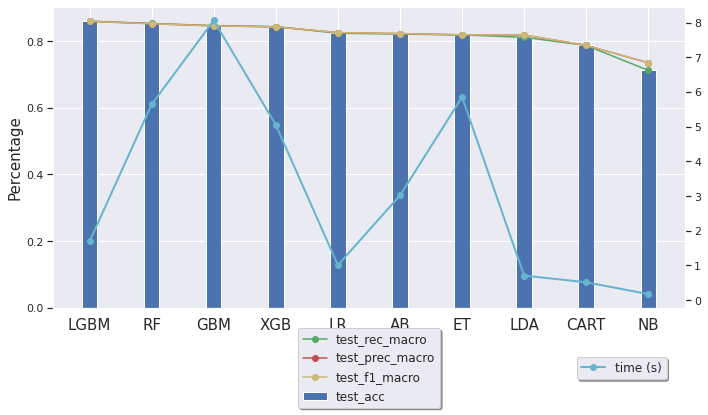

In [ ]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
test_f1_macro=df_results_val['test_f1_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')
rects4 = ax.plot(x, test_prec_macro, color = 'y',marker='o',label='test_f1_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

In [ ]:
rfc = LGBMClassifier()
rfc.fit(X_train_scaler, y_train)
rfc_pred = rfc.predict(X_test_scaler)

print(confusion_matrix(y_test,rfc_pred))
print('Accuracy score:',accuracy_score(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[937 238]
 [ 93 965]]
Accuracy score: 0.851768920734438
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1175
           1       0.80      0.91      0.85      1058

    accuracy                           0.85      2233
   macro avg       0.86      0.85      0.85      2233
weighted avg       0.86      0.85      0.85      2233

